## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Просмотр данных

### Общая информация

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/datasets/games.csv')

**Описание данных**
*	Name — название игры
*	Platform — платформа
*	Year_of_Release — год выпуска
*	Genre — жанр игры
*	NA_sales — продажи в Северной Америке (миллионы проданных копий)
*	EU_sales — продажи в Европе (миллионы проданных копий)
*	JP_sales — продажи в Японии (миллионы проданных копий)
*	Other_sales — продажи в других странах (миллионы проданных копий)
*	Critic_Score — оценка критиков (максимум 100)
*	User_Score — оценка пользователей (максимум 10)
*	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [ ]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Приведём названия столбцов к нижнему регистру.

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
data.duplicated().sum()

0

Наш датасет длиной в 16715 игр. 

Столбец year_of_release имеет тип данных float, хотя по сути данные имеет целочисленный тип, к которому его и надо будет привести. Cтолбец user_score имеет почему-то тип данных object. Нужно будет посмотреть, что в нем, и привести к корректоному типу.

Видим пропуски в name, genre, year_of_release, critic_score, user_score, rating. Пропуски в name и genre настораживают - если по всем остальным пунктам в этих строках будут также пропуски, то их придется удалить как неинформативные. 

Полных дубликатов в датасете нет.

### name

In [ ]:
len(data['name'].unique())

11560

Всего у нас 11560 уникальных названий игр. Приведём их к нижнему регистру, чтобы проверить, не затесался ли дубликат, написанный в разных регистрах.

In [ ]:
data['name'] = data['name'].str.lower()
len(data['name'].unique())

11560

Количество уникальных значений то же. 

Посмотрим на топ10 популярных игр - на скольких платформах они были выпущены.

In [ ]:
data['name'].value_counts().head(10)

need for speed: most wanted                12
fifa 14                                     9
lego marvel super heroes                    9
madden nfl 07                               9
ratatouille                                 9
lego star wars ii: the original trilogy     8
angry birds star wars                       8
lego harry potter: years 5-7                8
terraria                                    8
lego the hobbit                             8
Name: name, dtype: int64

Максимальное количество платформ для одной игры (need for speed: most wanted) - 12.

Посмотрим на пропущенные имена:

In [ ]:
data['name'] = data['name'].fillna("show_the_line")

In [ ]:
data.query('name == "show_the_line"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,show_the_line,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,show_the_line,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропущены названия двух игр 1993 года выпуска на платформе GEN. Про них так же неизвестны: их жанры, рейтинг, оценки игроков и критиков. 

Вероятно, будет правильно в дальнейшем удалить эти строки из датафрейма. 

### platform

Посмотрим на представленные платформы в порядке убывания количества выпущенных для них игр. 

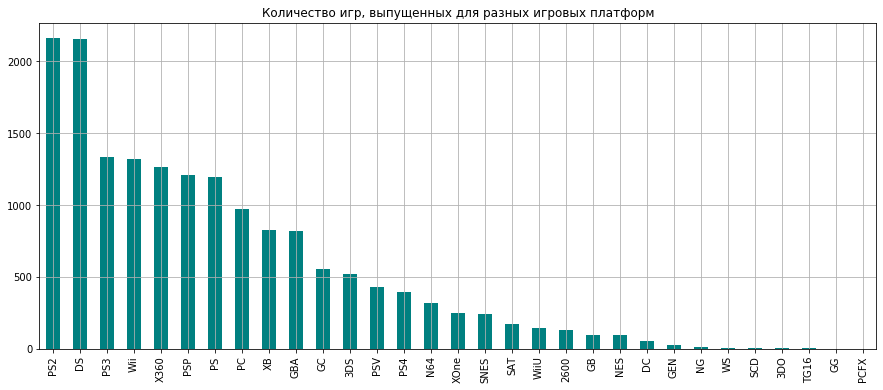

In [ ]:
data['platform'].value_counts().plot(kind='bar', figsize=(15,6), grid=True, color='teal', title='Количество игр, выпущенных для разных игровых платформ')

Самые популярные платформы - PS2, DS.

### year_of_release

In [ ]:
print('Уникальные обозначения года в датасете:', data['year_of_release'].sort_values().unique())
print('Всего лет, исключая nan:', len(data['year_of_release'].unique())-1)

Уникальные обозначения года в датасете: [1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]
Всего лет, исключая nan: 37


Построим гистограмму с 37 корзинами:

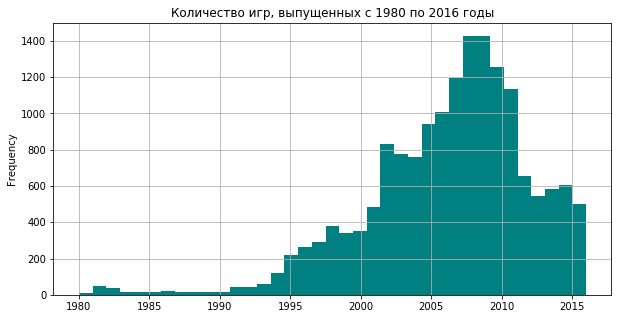

In [ ]:
data['year_of_release'].plot(kind='hist', bins=37, figsize=(10,5), grid=True, color='teal', title='Количество игр, выпущенных с 1980 по 2016 годы')

Пик выпуска игр пришелся на 2008 и 2009 годы. 

In [ ]:
data[data['year_of_release'].isna()].isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       115
user_score          94
rating              88
dtype: int64

Пропусков информации о годе выпуска игры (по таблице isna) - 269. У нас нет информации для массового заполнения пропусков, но терять данные не хочется, так как остальные параметры более или менее сохранны.

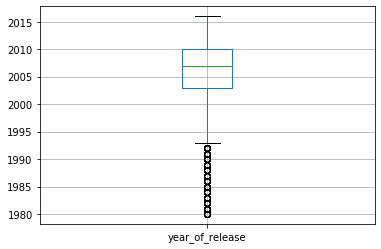

In [ ]:
data.boxplot('year_of_release')

Можем увидеть, как нарастало количество выпускаемых игр с момента, когда они были ещё редкостью.

### genre

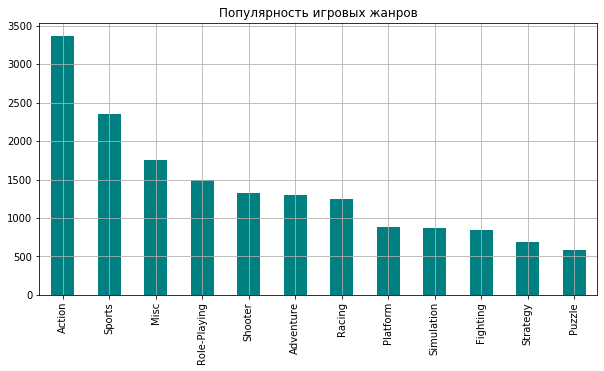

In [ ]:
data['genre'].value_counts().plot(kind='bar', figsize=(10,5), grid=True, color='teal', title='Популярность игровых жанров')

In [ ]:
print('Всего жанров, исключая nan:', len(data['genre'].unique())-1)

Всего жанров, исключая nan: 12


Пропусков в информации о жанрах у нас, как мы помним, 2, и они совпадают с двумя пропусками в именах. Также в этих данных нет информации о рейтингах, поэтому, вероятно, эти строки будут удалены.

### sales

#### na_sales

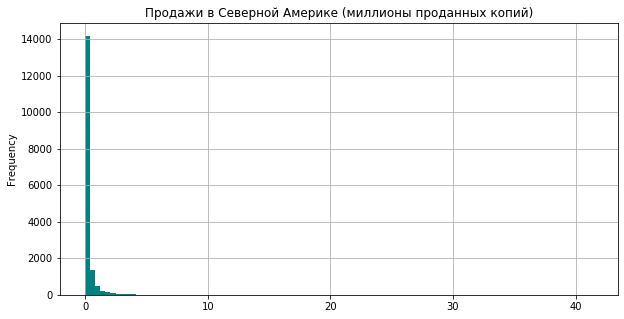

In [ ]:
data['na_sales'].plot(kind='hist', bins=100, figsize=(10,5), grid=True, color='teal', title='Продажи в Северной Америке (миллионы проданных копий)')

In [ ]:
data['na_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

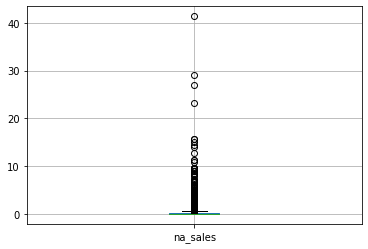

In [ ]:
data.boxplot('na_sales')

(0, 0.8)

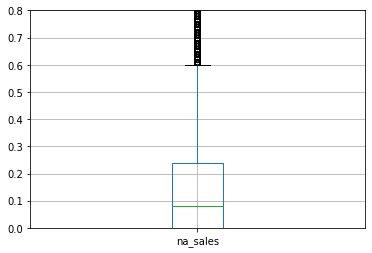

In [ ]:
data.boxplot('na_sales')
plt.ylim([0, 0.8])

Подавляющее большинство игр продано в Северной Америке в количестве менее четверти миллиона копий, однако есть экземпляры, проданные в количестве до 41.36 млн копий. Такие продажи существенно перекашивают нашу выборку (велика разница между средним и медианой). Другая причина такого распределения в нулевых продажах. 
При проверке статистических гипотез, мы будем рассматривать этот параметр без выбросов.

In [ ]:
data.query('na_sales == 41.360000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Обладателем самой большой цифры в продажах стала игра wii sports.

Нулевые продажи - несуществующие в данном регионе продажи, их мы рассматривать не будем. Можно предположить, что появились они вследствие замены пропусков нулями. При предобработке данных мы вернем данным прежний вид - с пропусками, в таком случае будут корректно посчитаны данные по регионам, при условии, что какие-то игры там совсем не продавались. Ниже мы увидим, что количество нулевых продаж велико, и именно поэтому предполагаем, что нулевые продажи - это не "ни одной не купили", а "игра здесь не продавалась".

Посчитаем количество нулевых продаж и посмотрим на выборку без них.

In [ ]:
len(data.query('na_sales == 0'))

4508

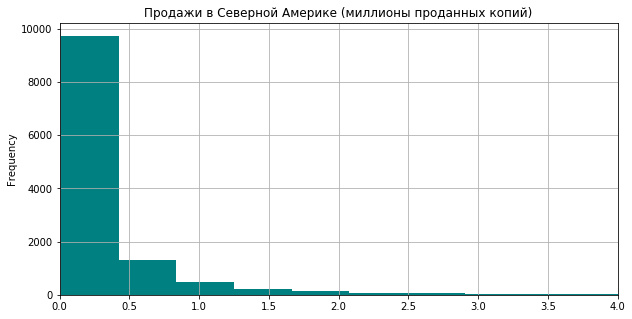

In [ ]:
data.query('na_sales > 0')['na_sales'].plot(kind='hist', xlim=(0,4), bins=100, figsize=(10,5), grid=True, color='teal', title='Продажи в Северной Америке (миллионы проданных копий)')

In [ ]:
data.query('na_sales > 0')['na_sales'].describe()

count    12207.000000
mean         0.360641
std          0.933459
min          0.010000
25%          0.060000
50%          0.140000
75%          0.340000
max         41.360000
Name: na_sales, dtype: float64

(0, 0.8)

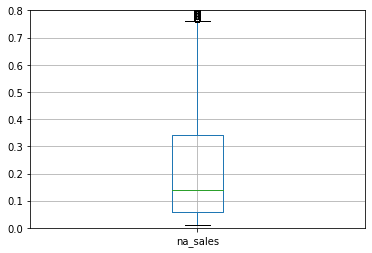

In [ ]:
data.query('na_sales > 0').boxplot('na_sales')
plt.ylim([0, 0.8])

Так гораздо лучше. Теперь и распределение можно разглядеть, и 25-й перцинтиль больше не равен нулю.

Посмотрим, как будут выглядеть американские продажи без выбросов.

In [ ]:
na_sales_r_border = data.query('na_sales > 0')['na_sales'].quantile(0.75) + (data.query('na_sales > 0')['na_sales'].quantile(0.75) - data.query('na_sales > 0')['na_sales'].quantile(0.25))*1.5
na_sales_l_border = data.query('na_sales > 0')['na_sales'].quantile(0.25) - (data.query('na_sales > 0')['na_sales'].quantile(0.75) - data.query('na_sales > 0')['na_sales'].quantile(0.25))*1.5
data_na_sales_n = data.query('na_sales > 0')[(data.query('na_sales > 0')['na_sales'] > na_sales_l_border) & (data.query('na_sales > 0')['na_sales'] < na_sales_r_border)]

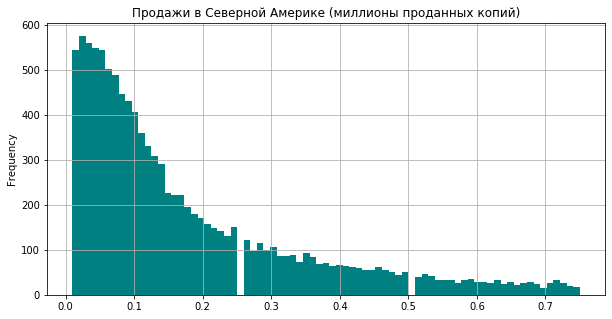

In [ ]:
data_na_sales_n['na_sales'].plot(kind='hist', bins=77, figsize=(10,5), grid=True, color='teal', title='Продажи в Северной Америке (миллионы проданных копий)')

In [ ]:
data_na_sales_n['na_sales'].describe()

count    10900.000000
mean         0.177168
std          0.167967
min          0.010000
25%          0.050000
50%          0.120000
75%          0.250000
max          0.750000
Name: na_sales, dtype: float64

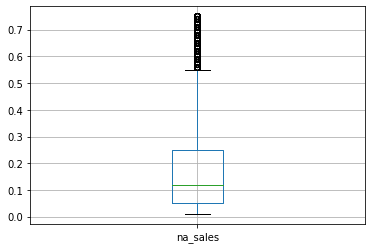

In [ ]:
data_na_sales_n.boxplot('na_sales')

Избавившись от выбросов (уменьшив дисперсию), мы можем разглядеть, как распределено большинств продаж в Северной Америке. У нас по-прежнему подавляющее большинство игр имеют невысокие продажи (меньше 100 тысяч копий). Примерно от 200 тысяч копий падение числа продаж на графике сглаживается. 

#### eu_sales

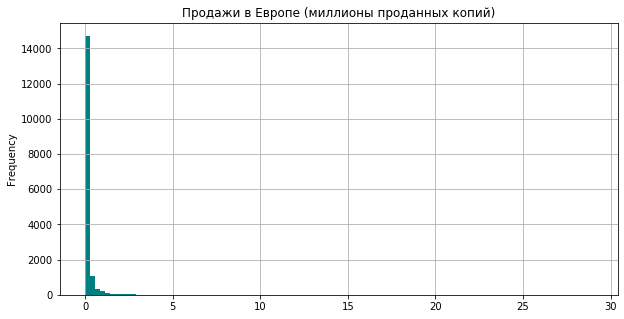

In [ ]:
data['eu_sales'].plot(kind='hist', bins=100, figsize=(10,5), grid=True, color='teal', title='Продажи в Европе (миллионы проданных копий)')

In [ ]:
data['eu_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

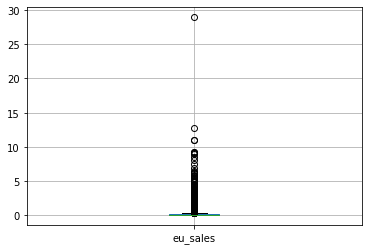

In [ ]:
data.boxplot('eu_sales')

(0, 0.4)

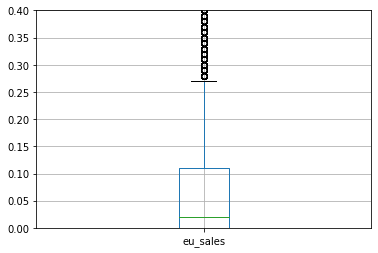

In [ ]:
data.boxplot('eu_sales')
plt.ylim([0, 0.4])

Ситуация с европейским продажами имеет тот же вид, что и с американскими - нулевые продажи и единичные гигантские продажи не дают рассмотреть, что там внутри. 

In [ ]:
data.query('eu_sales == 28.960000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Максимальное число продаж у той же wii sports

Посмотрим, как много нулевых продаж

In [ ]:
len(data.query('eu_sales == 0'))

5870

И как выглядят данные без них

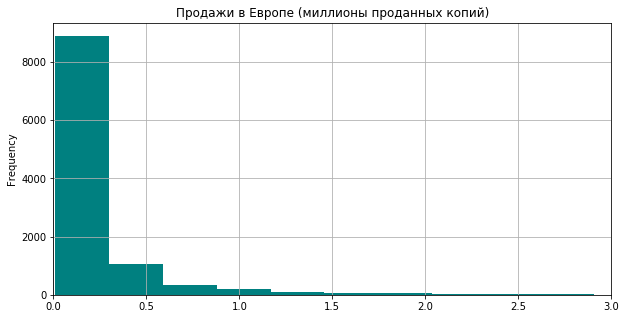

In [ ]:
data.query('eu_sales > 0')['eu_sales'].plot(kind='hist', xlim=(0,3), bins=100, figsize=(10,5), grid=True, color='teal', title='Продажи в Европе (миллионы проданных копий)')

In [ ]:
data.query('eu_sales > 0')['eu_sales'].describe()

count    10845.000000
mean         0.223575
std          0.610684
min          0.010000
25%          0.020000
50%          0.070000
75%          0.200000
max         28.960000
Name: eu_sales, dtype: float64

(0, 0.8)

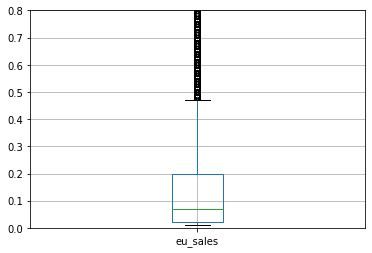

In [ ]:
data.query('eu_sales > 0').boxplot('eu_sales')
plt.ylim([0, 0.8])

Теперь можно разглядеть основные статистики. Большинство игр имеют продажи не больше 200 тыс. копий. Но среднее по-прежнему смещено. Посмрим на данные без выбросов.

In [ ]:
eu_sales_r_border = data.query('eu_sales > 0')['eu_sales'].quantile(0.75) + (data.query('eu_sales > 0')['eu_sales'].quantile(0.75) - data.query('eu_sales > 0')['eu_sales'].quantile(0.25))*1.5
eu_sales_l_border = data.query('eu_sales > 0')['eu_sales'].quantile(0.25) - (data.query('eu_sales > 0')['eu_sales'].quantile(0.75) - data.query('eu_sales > 0')['eu_sales'].quantile(0.25))*1.5
data_eu_sales_n = data.query('eu_sales > 0')[(data.query('eu_sales > 0')['eu_sales'] > eu_sales_l_border) & (data.query('eu_sales > 0')['eu_sales'] < eu_sales_r_border)]

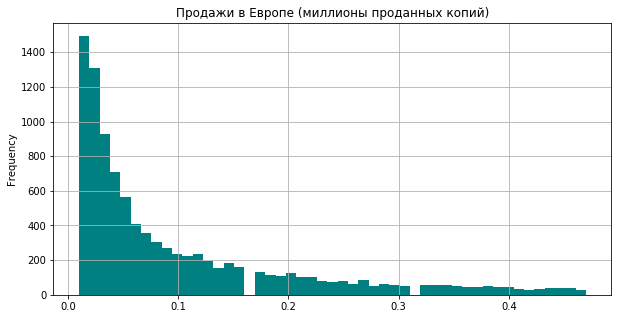

In [ ]:
data_eu_sales_n['eu_sales'].plot(kind='hist', bins=49, figsize=(10,5), grid=True, color='teal', title='Продажи в Европе (миллионы проданных копий)')

In [ ]:
data_eu_sales_n['eu_sales'].describe()

count    9685.000000
mean        0.098607
std         0.107862
min         0.010000
25%         0.020000
50%         0.050000
75%         0.140000
max         0.470000
Name: eu_sales, dtype: float64

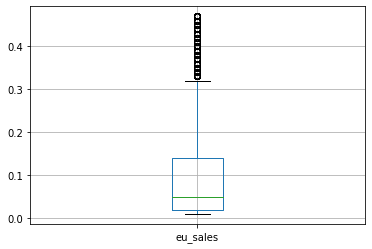

In [ ]:
data_eu_sales_n.boxplot('eu_sales')

После 50 тыс. копий (большинство продаж) график прекращает резкое падение и становится сглаженным. Количество игр, продаваемых ещё бОльшими тиражами не так велико.

#### jp_sales

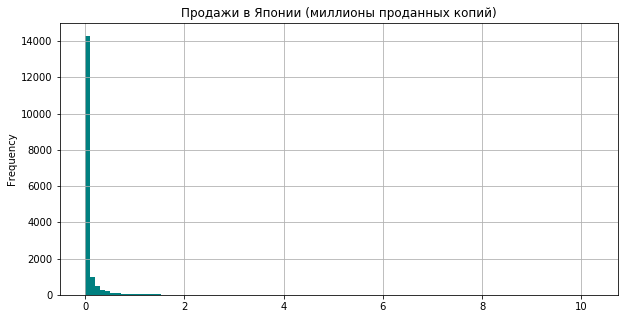

In [ ]:
data['jp_sales'].plot(kind='hist', bins=100, figsize=(10,5), grid=True, color='teal', title='Продажи в Японии (миллионы проданных копий)')

In [ ]:
data['jp_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

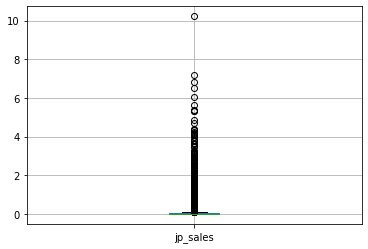

In [ ]:
data.boxplot('jp_sales')

В Японии, хоть и представлено меньшее количество продаж, картина с данными примерно та же.

Посмотрим, сколько нулевых продаж.

In [ ]:
len(data.query('jp_sales == 0'))

10514

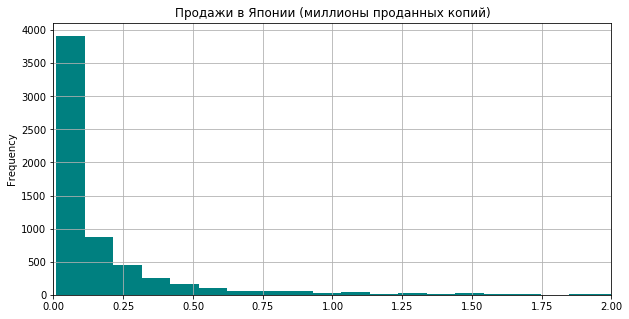

In [ ]:
data.query('jp_sales > 0')['jp_sales'].plot(kind='hist', xlim=(0,2), bins=100, figsize=(10,5), grid=True, color='teal', title='Продажи в Японии (миллионы проданных копий)')

In [ ]:
data.query('jp_sales > 0')['jp_sales'].describe()

count    6201.000000
mean        0.209219
std         0.479183
min         0.010000
25%         0.030000
50%         0.070000
75%         0.190000
max        10.220000
Name: jp_sales, dtype: float64

(0, 0.5)

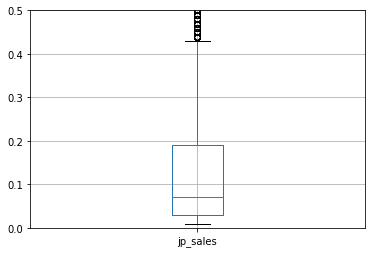

In [ ]:
data.query('jp_sales > 0').boxplot('jp_sales')
plt.ylim([0, 0.5])

Без нулевых продаж мы видим реальную картину, в которой около 3900 ирг были проданы тиражом до 70 тысяч копий. Однако, ещё имеются очень большие продажи, максимальная у игры pokemon red/pokemon blue 1996 года. 

In [ ]:
data.query('jp_sales == 10.220000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,NaN


Посмотрим на японские продажи без выбросов.

In [ ]:
jp_sales_r_border = data.query('jp_sales > 0')['jp_sales'].quantile(0.75) + (data.query('jp_sales > 0')['jp_sales'].quantile(0.75) - data.query('jp_sales > 0')['jp_sales'].quantile(0.25))*1.5
jp_sales_l_border = data.query('jp_sales > 0')['jp_sales'].quantile(0.25) - (data.query('jp_sales > 0')['jp_sales'].quantile(0.75) - data.query('jp_sales > 0')['jp_sales'].quantile(0.25))*1.5
data_jp_sales_n = data.query('jp_sales > 0')[(data.query('jp_sales > 0')['jp_sales'] > jp_sales_l_border) & (data.query('jp_sales > 0')['jp_sales'] < jp_sales_r_border)]

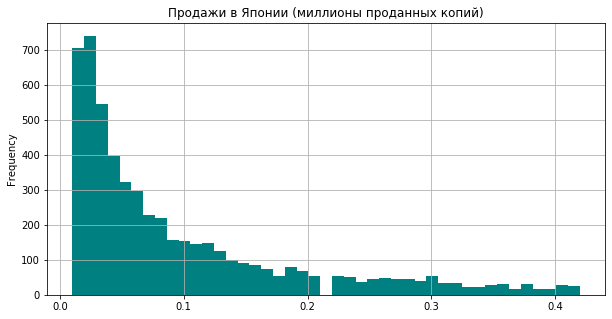

In [ ]:
data_jp_sales_n['jp_sales'].plot(kind='hist', bins=43, figsize=(10,5), grid=True, color='teal', title='Продажи в Японии (миллионы проданных копий)')

In [ ]:
data_jp_sales_n['jp_sales'].describe()

count    5516.000000
mean        0.095092
std         0.097100
min         0.010000
25%         0.020000
50%         0.060000
75%         0.130000
max         0.420000
Name: jp_sales, dtype: float64

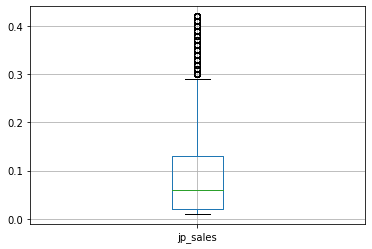

In [ ]:
data_jp_sales_n.boxplot('jp_sales')

График распределения продаж похож на предыдущие. Большинство - минимальное количество копий. 

#### other_sales

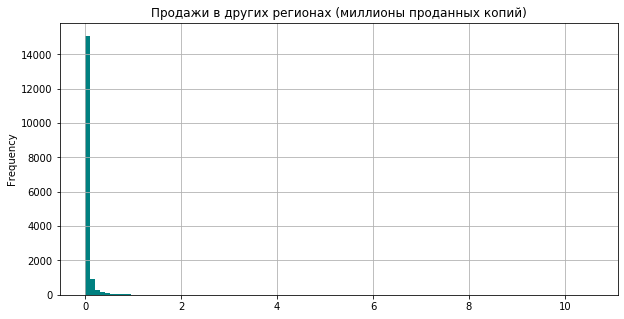

In [ ]:
data['other_sales'].plot(kind='hist', bins=100, figsize=(10,5), grid=True, color='teal', title='Продажи в других регионах (миллионы проданных копий)')

In [ ]:
data['other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

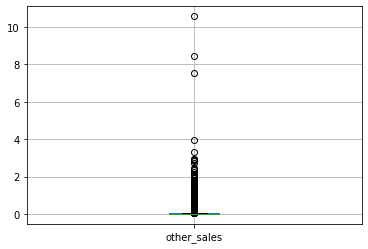

In [ ]:
data.boxplot('other_sales')

Остальные продажи имеют тот же вид, что и предыдущие.

Рассмотрим без нулевых.

In [ ]:
len(data.query('other_sales == 0'))

6601

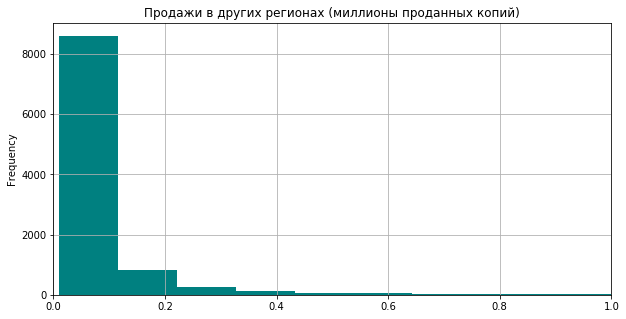

In [ ]:
data.query('other_sales > 0')['other_sales'].plot(kind='hist', xlim=(0,1), bins=100, figsize=(10,5), grid=True, color='teal', title='Продажи в других регионах (миллионы проданных копий)')

In [ ]:
data.query('other_sales > 0')['other_sales'].describe()

count    10114.000000
mean         0.078240
std          0.234969
min          0.010000
25%          0.010000
50%          0.020000
75%          0.070000
max         10.570000
Name: other_sales, dtype: float64

(0, 0.2)

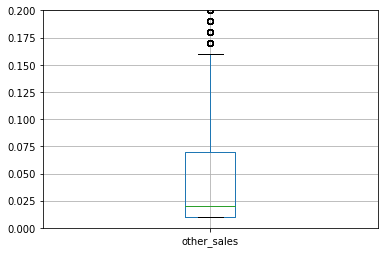

In [ ]:
data.query('other_sales > 0').boxplot('other_sales')
plt.ylim([0, 0.2])

In [ ]:
data.query('other_sales == 10.570000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,grand theft auto: san andreas,PS2,2004.0,Action,9.43,0.4,0.41,10.57,95.0,9,M


Максимальные продажи у grand theft auto: san andreas

А теперь рассмотрим  без выбросов.

In [ ]:
other_sales_r_border = data.query('other_sales > 0')['other_sales'].quantile(0.75) + (data.query('other_sales > 0')['other_sales'].quantile(0.75) - data.query('other_sales > 0')['other_sales'].quantile(0.25))*1.5
other_sales_l_border = data.query('other_sales > 0')['other_sales'].quantile(0.25) - (data.query('other_sales > 0')['other_sales'].quantile(0.75) - data.query('other_sales > 0')['other_sales'].quantile(0.25))*1.5
data_other_sales_n = data.query('other_sales > 0')[(data.query('other_sales > 0')['other_sales'] > other_sales_l_border) & (data.query('other_sales > 0')['other_sales'] < other_sales_r_border)]

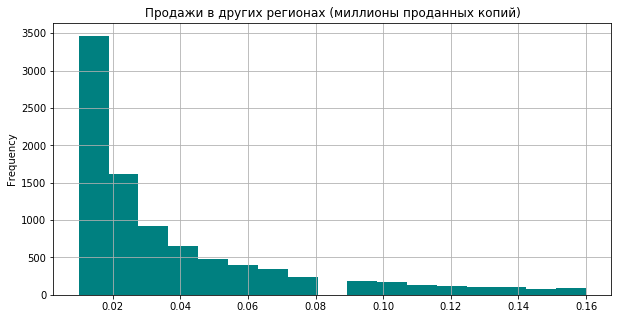

In [ ]:
data_other_sales_n['other_sales'].plot(kind='hist', bins=17, figsize=(10,5), grid=True, color='teal', title='Продажи в других регионах (миллионы проданных копий)')

In [ ]:
data_other_sales_n['other_sales'].describe()

count    9085.000000
mean        0.035971
std         0.034992
min         0.010000
25%         0.010000
50%         0.020000
75%         0.050000
max         0.160000
Name: other_sales, dtype: float64

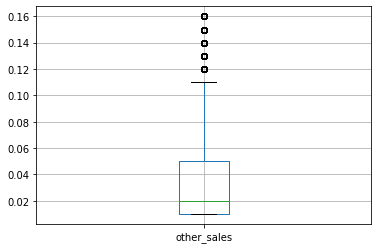

In [ ]:
data_other_sales_n.boxplot('other_sales')

#### Вывод

Необходимо создать новый столбец с суммой всех продаж и убрать нули из столбцов продаж по регионам.

### critic_score

In [ ]:
data['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

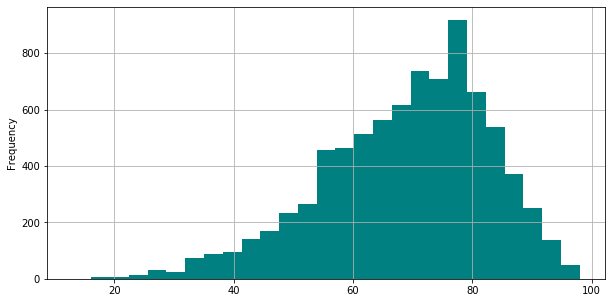

In [ ]:
data['critic_score'].plot(kind='hist', bins=27, figsize=(10,5), grid=True, color='teal', title='')

Критики оценивали по 100-балльной шкале. Большинство игр оценены примерно в 70 баллов. И по смещению гистограммы можно сказать, что хороших игр по мнению критиков больше, чем плохих. 

Пропуски в оценках критиков достаточно много. При заполнении их средними значениями, мы можем существенно исказать данные. Пока оставим пропуски на месте, и при необходимости в дальнейшем избавимся от них.

### user_score

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
data['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

tbd, который мешает рассмотреть этот столбец, как численный, означает "To Be Determined" - то есть это ещё не полученные на момент формирования датасета оценки игроков.

In [ ]:
len(data.query('user_score == "tbd"'))

2424

In [ ]:
pd.to_numeric(data.query('user_score != "tbd"')['user_score'], errors='raise').describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

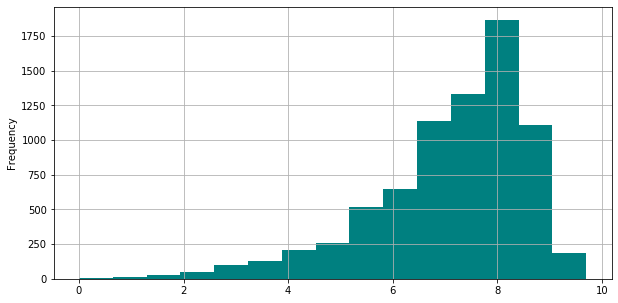

In [ ]:
pd.to_numeric(data.query('user_score != "tbd"')['user_score'], errors='raise').plot(kind='hist', bins=15,  figsize=(10,5), grid=True, color='teal', title='')

Оценки игроков представлены по 10-балльной шкале. Они склонны ставить хорошие оценки чаще, чем плохие. Средняя оценка в районе 7 баллов. Для корректного сравнения с оценками критиков нужно будет привести шкалы к единому знаменателю.

С пропусками в оценках пользователей мы обойдёмся таким же образом, как и с пропусками в оценках критиков - оставим на месте, и избавимся в момент необходимости.

### rating

Посмотрим, как выглядит рейтинг. 

In [ ]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Много непонятных букв. Спросим гугл про рейтинги игр. Вот, что он рассказал:

**Рейтинг игр ESRB**

**«EC» («Early childhood»)** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».

**«E» («Everyone») — «Для всех»**: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. **Первоначально "K-A" ("Kids to Adults")**

**«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»**: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

**«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше**. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

**«M» («Mature») — «Для взрослых»**: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

**«AO» («Adults Only 18+») — «Только для взрослых»**: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначены для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.

**«RP» («Rating Pending») — «Рейтинг ожидается»**: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Все эти буквы и есть среди уникальных значений столбца rating. K-A имеет то же значение, что и E, поэтому при предобработке заменим, чтобы не дублировали друг друга. 

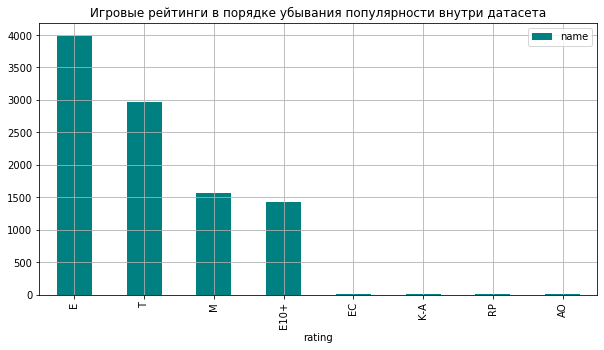

In [ ]:
data.pivot_table(index='rating', values='name', aggfunc='count').sort_values(by='name', ascending=False).plot(kind='bar', figsize=(10,5), grid=True, color='teal', title='Игровые рейтинги в порядке убывания популярности внутри датасета')

Единичными играми представлены EC (8 игр) и AO (всего 1 игра).

In [ ]:
data.query('rating == "AO" or rating == "EC"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,grand theft auto: san andreas,XB,2005.0,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO
4297,nickelodeon team umizoomi,DS,2011.0,Action,0.42,0.00,0.0,0.03,NaN,tbd,EC
5034,sesame street: elmo's a-to-zoo adventure,Wii,2010.0,Misc,0.35,0.00,0.0,0.02,NaN,tbd,EC
6046,sesame street: cookie's counting carnival,Wii,2010.0,Misc,0.27,0.00,0.0,0.02,NaN,tbd,EC
6764,dora the explorer: journey to the purple planet,PS2,2005.0,Adventure,0.12,0.09,0.0,0.03,NaN,7,EC
7586,"ni hao, kai-lan: new year's celebration",DS,2009.0,Misc,0.19,0.00,0.0,0.01,NaN,tbd,EC
9960,dora the explorer: journey to the purple planet,GC,2005.0,Adventure,0.09,0.02,0.0,0.00,NaN,tbd,EC
13065,sesame street: cookie's counting carnival,PC,2010.0,Misc,0.05,0.00,0.0,0.00,NaN,tbd,EC
13455,sesame street: elmo's a-to-zoo adventure,PC,2010.0,Misc,0.04,0.00,0.0,0.00,NaN,tbd,EC


Вот самая жестокая и самые детские игры из датасета, ни одна из которых не пользовалась успехом в Японии. И критики еще недостаточно подросли, чтобы ставить оценки играм.

<div class="alert alert-info">Пропуски в рейтинге игр при предобработке мы заменим на 'no rating'. К этой же категории присоединим 'RP', так как такой статус возможен только до релиза игры.</div>

### Вывод

Задачи для предобработки данных:


* Удалить 2 строки с пропущенными name и genre.
* Убрать нули из столбцов продаж по регионам.
* Создать новый столбец с суммой всех продаж. 
* Оценки критиков привести к 10-балльной шкале.
* Оценки игроков привести к корректному типу данных, убрать tbd.
* K-A имеет то же значение, что и E, поэтому при предобработке заменим, чтобы не дублировали друг друга.

## Предобработка данных

Удалим две строки с пропусками в name, genre.

In [ ]:
data = data.query('name != "show_the_line"')
data.shape

(16713, 11)

Присвоим столбцам с продажами их истинные размеры.

In [ ]:
data.loc[data['na_sales'] == 0.0, 'na_sales'] = np.NaN
data.loc[data['eu_sales'] == 0.0, 'eu_sales'] = np.NaN
data.loc[data['jp_sales'] == 0.0, 'jp_sales'] = np.NaN
data.loc[data['other_sales'] == 0.0, 'other_sales'] = np.NaN

Создадим новый столбец - с суммой продаж каждой игры во всех регионах.

In [ ]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [ ]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 5 columns):
na_sales       12206 non-null float64
eu_sales       10844 non-null float64
jp_sales       6200 non-null float64
other_sales    10113 non-null float64
total_sales    16713 non-null float64
dtypes: float64(5)
memory usage: 783.4 KB


А теперь посмотрим, есть ли суммарные нулевые продажи

In [ ]:
data.query('total_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,g1 jockey 4 2008,PS3,2008.0,Sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
16709,score international baja 1000: the official game,PS2,2008.0,Racing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Так как продажи - ключевой параметр анализа, эти строки для нас бесполезны - удалим.

In [ ]:
data = data.query('total_sales != 0')
data.shape

(16711, 12)

Переведём оценки критиков из 100-балльной в 10-балльную шкалу.

In [ ]:
data['critic_score'] = data['critic_score']/10
data['critic_score'].describe()

count    8137.000000
mean        6.896768
std         1.393816
min         1.300000
25%         6.000000
50%         7.100000
75%         7.900000
max         9.800000
Name: critic_score, dtype: float64

В столбце user_score заменим tbd на NaN и приведем данные к типу float.

In [ ]:
print('Количество пустых значений до замены:', data['user_score'].isnull().sum())
data.loc[data['user_score'] == "tbd", 'user_score'] = np.NaN
print('Количество пустых значений после замены:', data['user_score'].isnull().sum())

Количество пустых значений до замены: 6697
Количество пустых значений после замены: 9121


In [ ]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='raise')
data['user_score'].dtype

dtype('float64')

В столбце rating присоединим "K-A" к категории "E"

In [ ]:
data.loc[data['rating'] == "K-A", 'rating'] = "E"

<div class="alert alert-info">Заменим пропуски в рейтинге на 'no_rating'. К этой же категории присоединим RP (рейтинг ожидается)</div>

In [ ]:
data['rating'] = data['rating'].fillna('no_rating')
data.loc[data['rating'] == "RP", 'rating'] = "no_rating"
data['rating'].value_counts()

no_rating    6765
E            3993
T            2961
M            1563
E10+         1420
EC              8
AO              1
Name: rating, dtype: int64

Вернем последовательность индексов

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6031,the bigs 2,Wii,2009.0,Sports,0.26,0.01,NaN,0.02,6.8,8.5,E10+,0.29
6967,scrabble (others sales),DS,2009.0,Puzzle,NaN,0.23,NaN,NaN,NaN,NaN,no_rating,0.23
16627,shirogane no soleil: contract to the future - ...,PS2,2008.0,Adventure,NaN,NaN,0.01,NaN,NaN,NaN,no_rating,0.01
7797,tokimeki memorial girl's side 3rd story,DS,2010.0,Adventure,NaN,NaN,0.19,NaN,NaN,NaN,no_rating,0.19
3481,nfl blitz 2000,N64,1999.0,Sports,0.55,0.02,NaN,NaN,NaN,NaN,no_rating,0.57


## Исследовательский анализ данных

### Количество игр и игровых платформ с 1985 по 2016 год

Посмотрим поподробнее на количество игр, выпускавшихся в разные годы. Из условий задания нам известно, что данные за 2016 год могут быть неполными, поэтому мы рассмотрим те данные, сбор которых завершён.

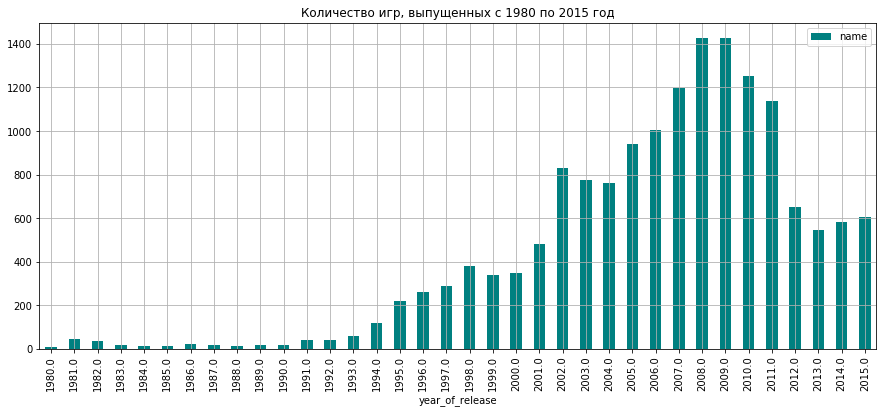

In [ ]:
data.query('year_of_release < 2016').pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(15,6), grid=True, color='teal', title='Количество игр, выпущенных с 1980 по 2015 год')

Из гистограммы мы видим, что пик выпуска игр пришёлся на 2008-2009 годы, после которых стал наблюдаться спад. Начиная с 2013 года снова видна тенденция к росту количества выпущенных игр.

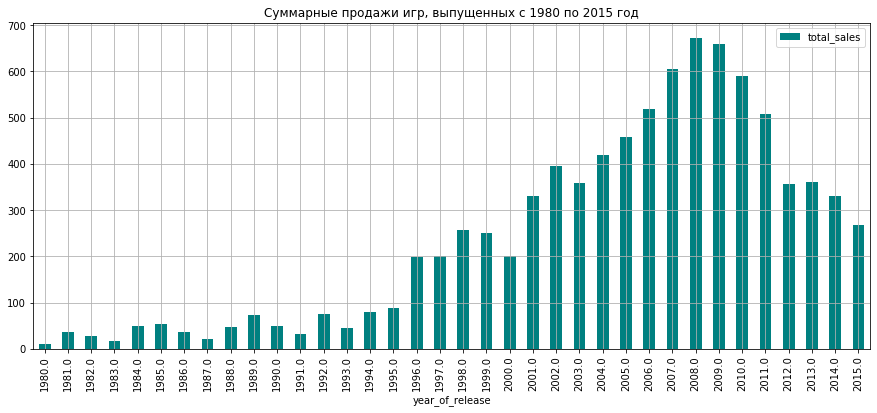

In [ ]:
data.query('year_of_release < 2016').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,6), grid=True, color='teal', title='Суммарные продажи игр, выпущенных с 1980 по 2015 год')

C 2008-2009 года суммарные продажи игр падают (как и их выпуск). Вероятно, многие игроки купили смартфоны и играют теперь на них.

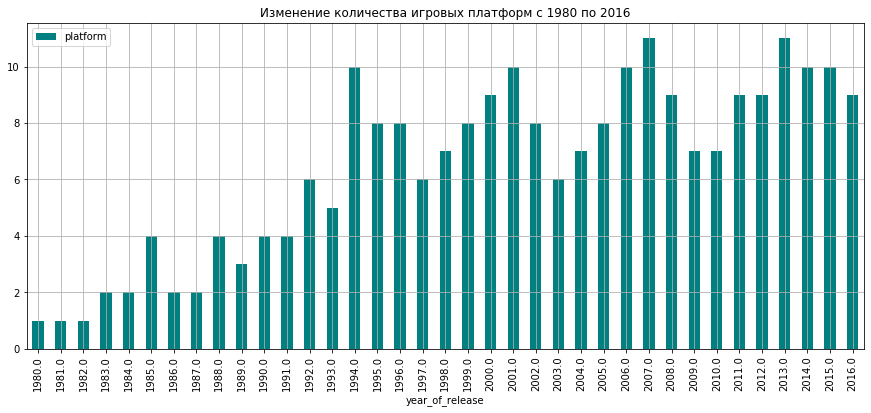

In [ ]:
data_pivot_year_platform = data.pivot_table(index=['year_of_release', 'platform'], values='name', aggfunc='count').reset_index()
data_pivot_year_platform.pivot_table(index='year_of_release', values='platform', aggfunc='count').plot(kind='bar', figsize=(15,6), grid=True, color='teal', title='Изменение количества игровых платформ с 1980 по 2016')

Есть впечатление, что количество игровых платформ на рынке циклично. Вероятно, с появлением новых приставок и технологий в производстве игр, отпадают прежние, потом нарастает количество новых и так до очередного обновления. Интересно посмотреть на ситуацию в целом, но для анализа на сегодняшний день нам нужно найти те платформы, для которых выпускают игры сейчас (то есть на момент создания датасета).

Так выглядят доли платформ, для которых выпускали игры, в разные годы.

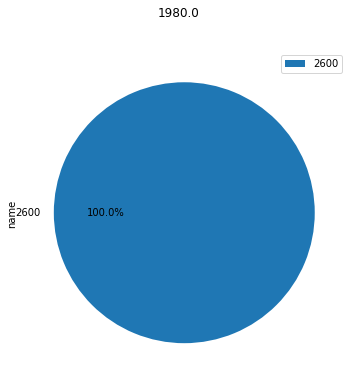

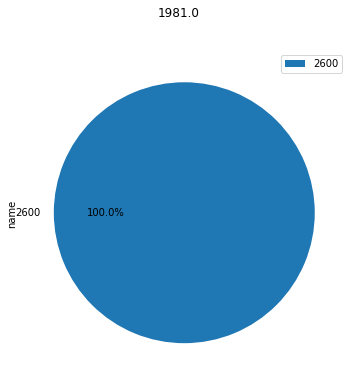

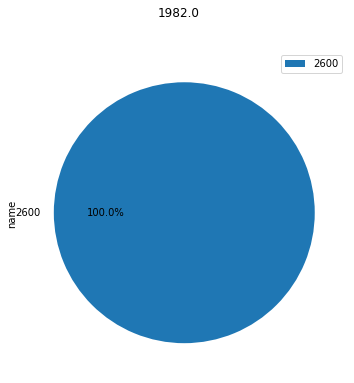

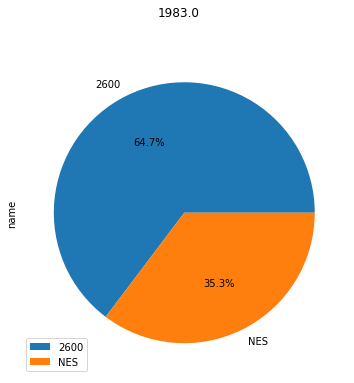

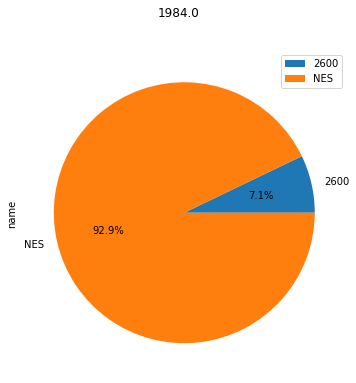

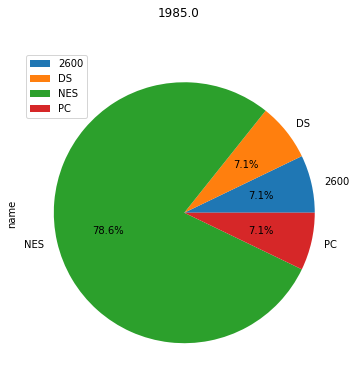

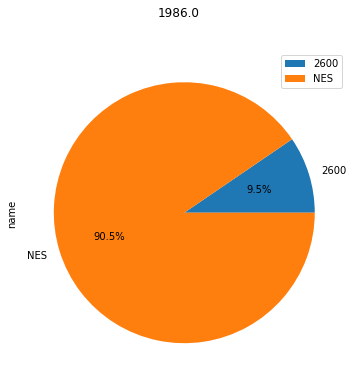

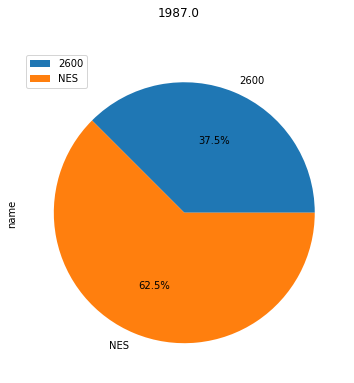

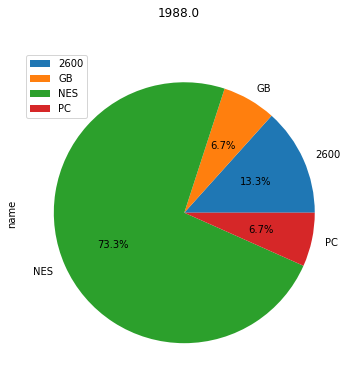

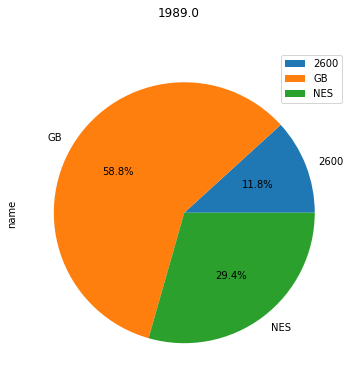

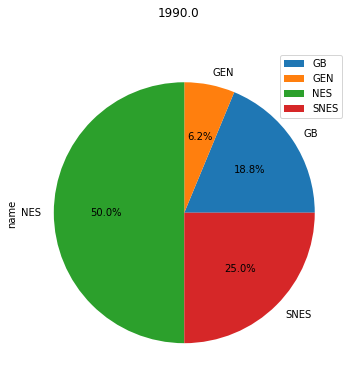

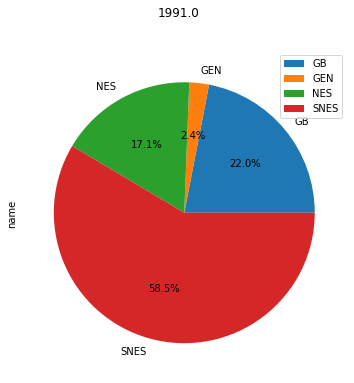

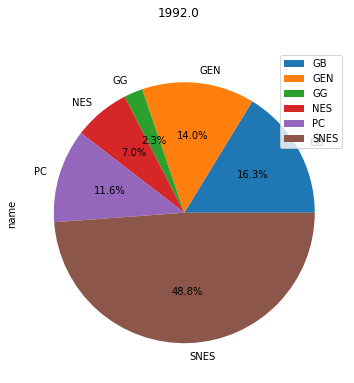

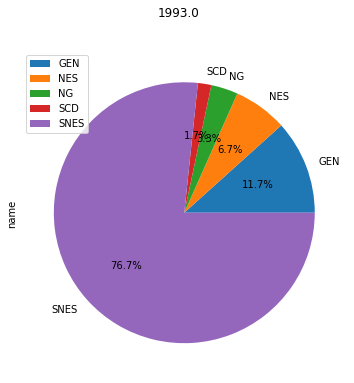

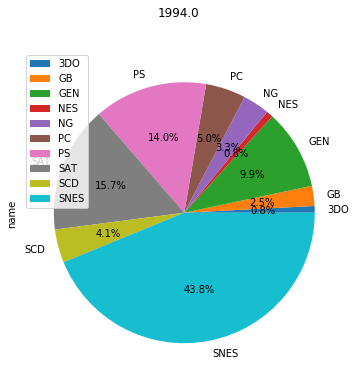

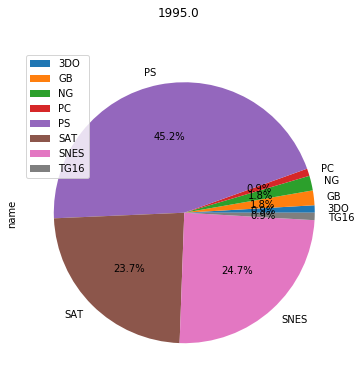

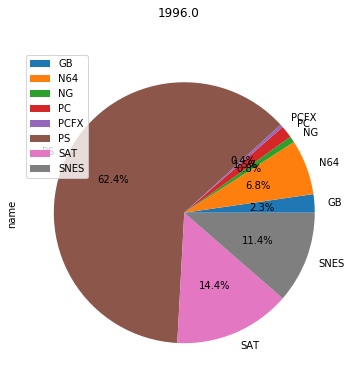

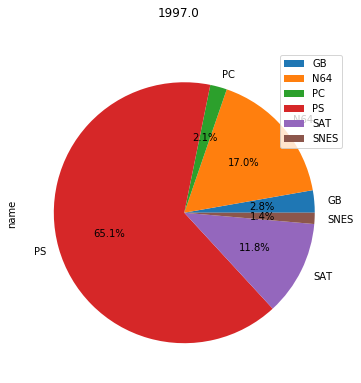

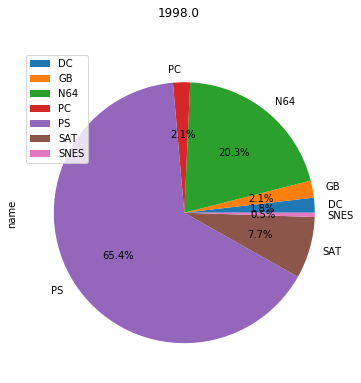

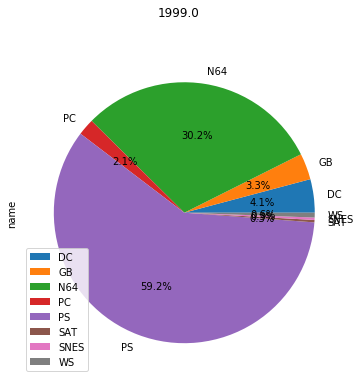

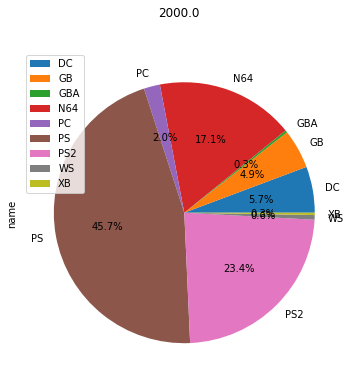

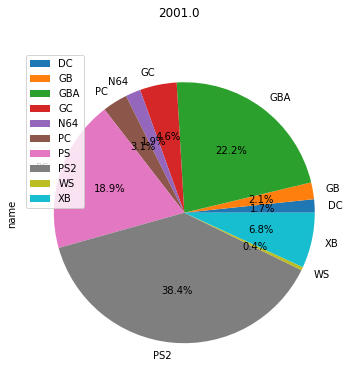

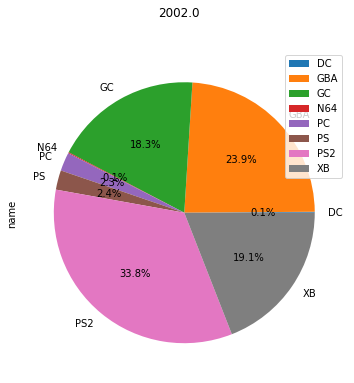

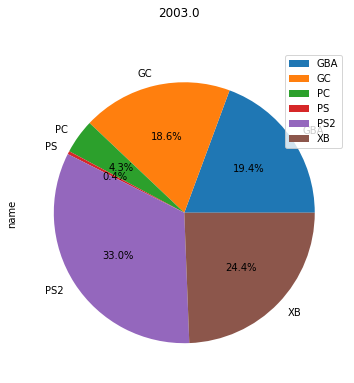

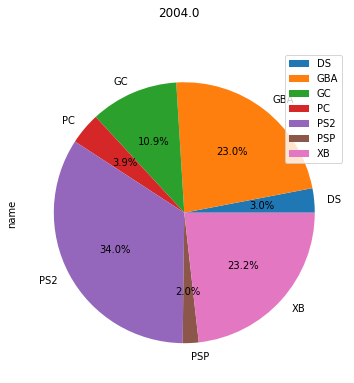

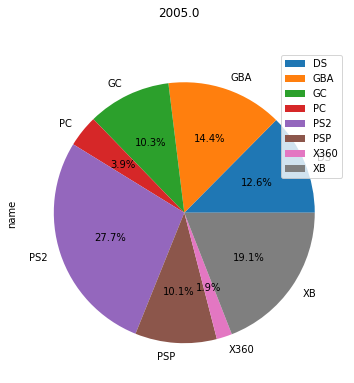

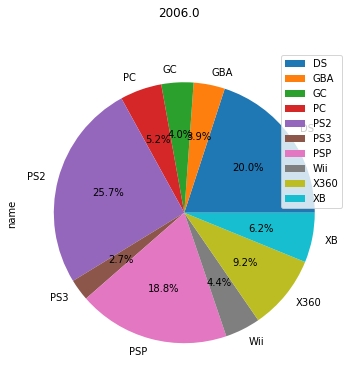

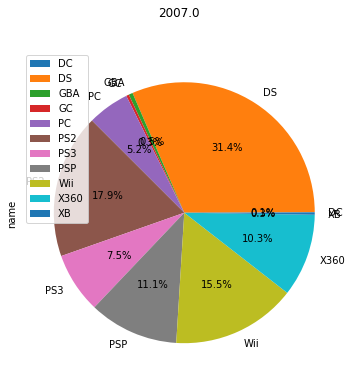

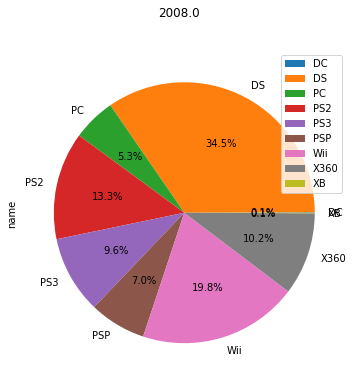

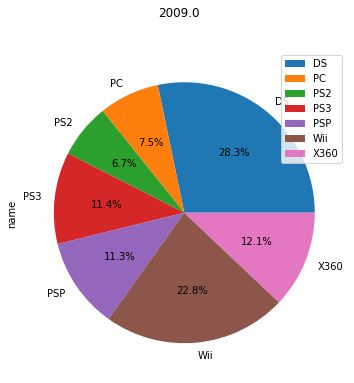

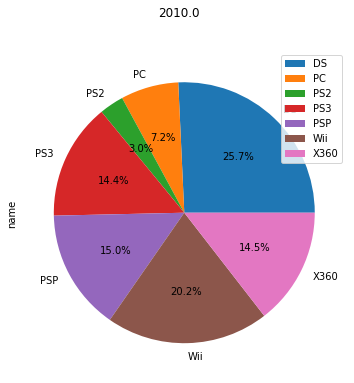

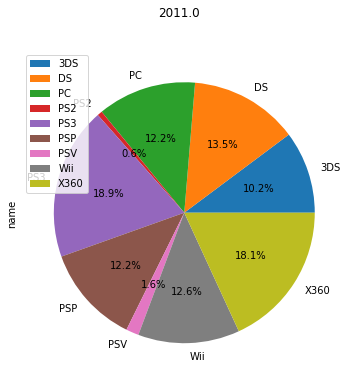

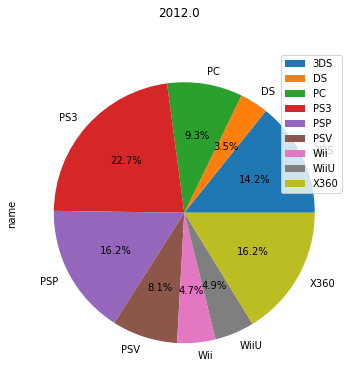

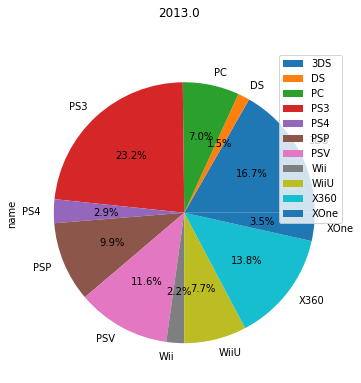

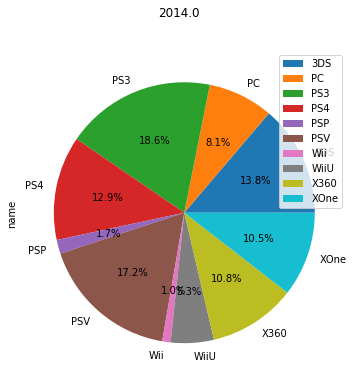

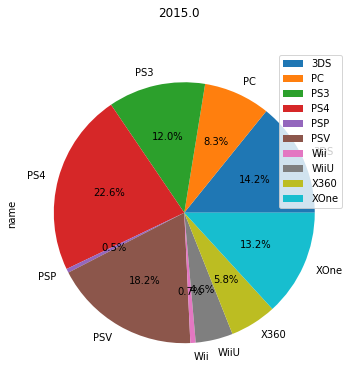

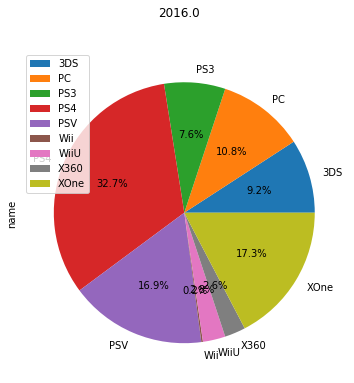

In [ ]:
for i, group_data in data.groupby('year_of_release'):
    group_data.pivot_table(index='platform', values='name', aggfunc='count').plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(6,6), title=i)

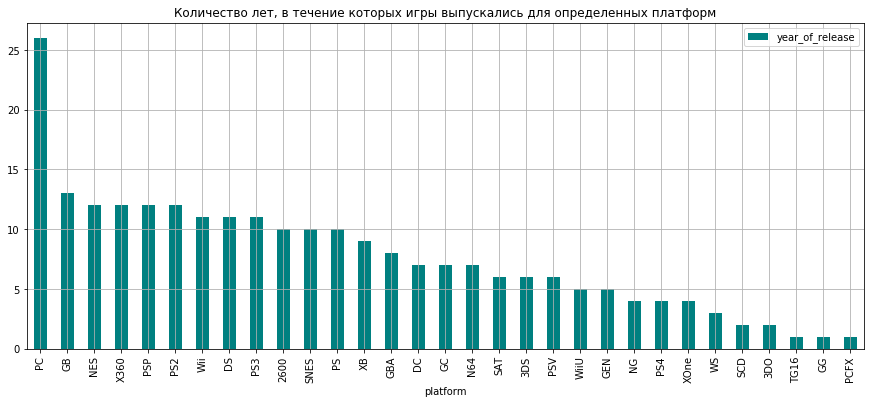

In [ ]:
data_pivot_year_platform.pivot_table(index='platform', values='year_of_release', aggfunc='count').sort_values(by='year_of_release', ascending=False).plot(kind='bar', figsize=(15,6), grid=True, color='teal',  title='Количество лет, в течение которых игры выпускались для определенных платформ')

На диаграмме мы видим, для каких платформ игры выпускали дольше, но это пока ничего не говорит об их актуальности. В топе игры для персональных компьютеров, GB, NES, PSP - они прожили дольше всех. Нужно понять, кто из них ещё жив.

#### Определение актуального периода и актуальных платформ

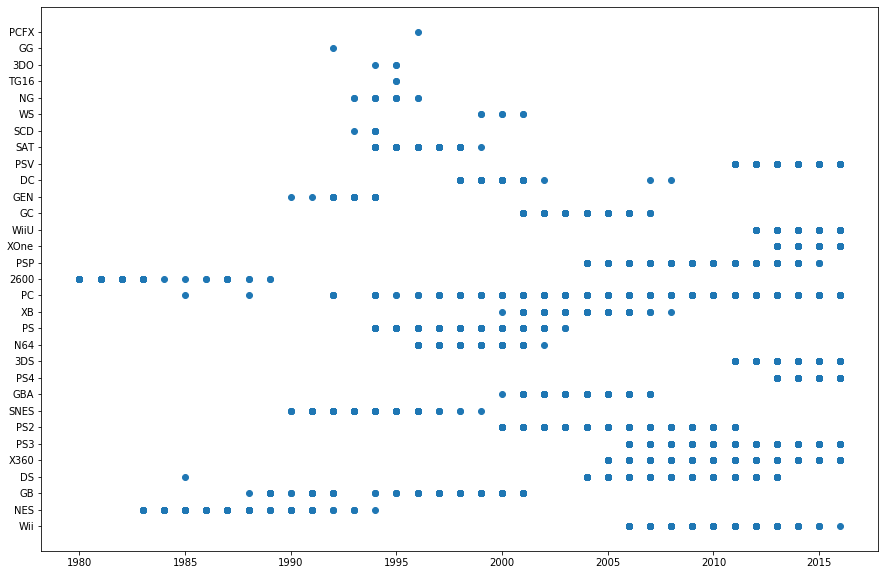

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(x = data['year_of_release'], y = data['platform'])
plt.show()

А на этом графике мы как раз можем увидеть, для каких платформ были выпущены игры в последние годы. Мы помним, что 2016 год в нашем датасете неполный, поэтому отсутствие релизов для PSP в 2016 году ещё не говорит, что их больше не будет. Возьмёи сред данных за 2015 год - все платформы, для которых были выпущены игры в этом году, будем считать актуальными. 

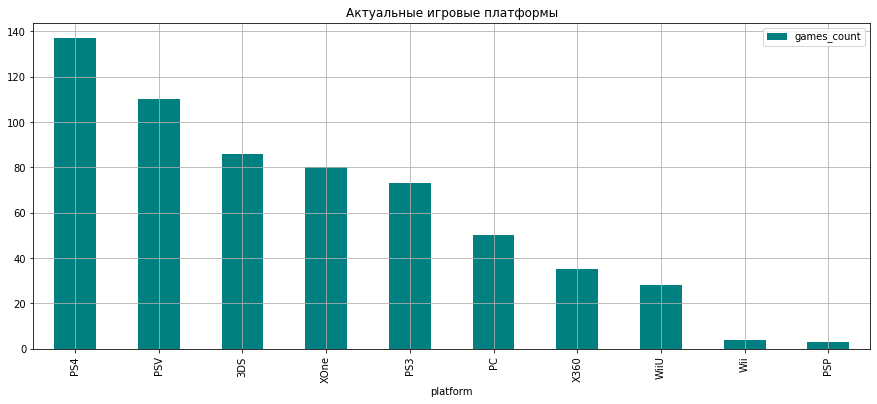

In [ ]:
actual_platforms = data.query('year_of_release == 2015').pivot_table(index='platform', values='name', aggfunc='count').rename(columns={'name': 'games_count'}).sort_values(by='games_count', ascending=False)
actual_platforms.plot(kind='bar', figsize=(15,6), grid=True, color='teal',  title='Актуальные игровые платформы')

Всего в нашем датасете представлено 10 платформ, для которых ежегодно выпускают игры, лидером среди которых на 2015 год является PS4.

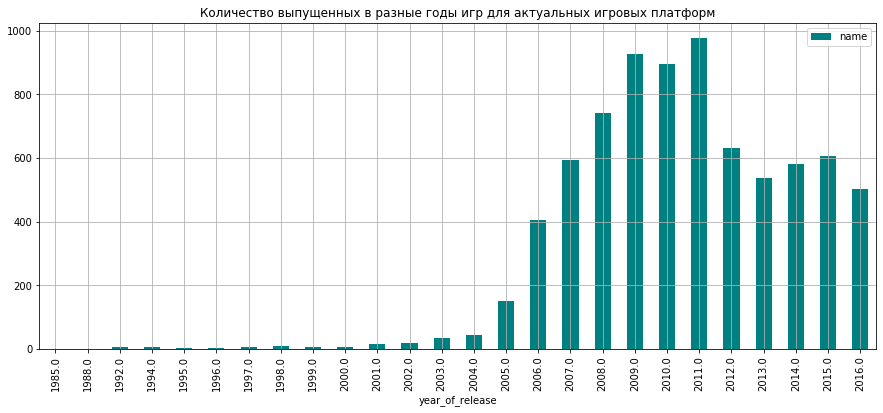

In [ ]:
actual_platforms_list = actual_platforms.reset_index()['platform'].unique()
data.query('platform in @actual_platforms_list').pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(15,6), grid=True, color='teal',  title='Количество выпущенных в разные годы игр для актуальных игровых платформ')

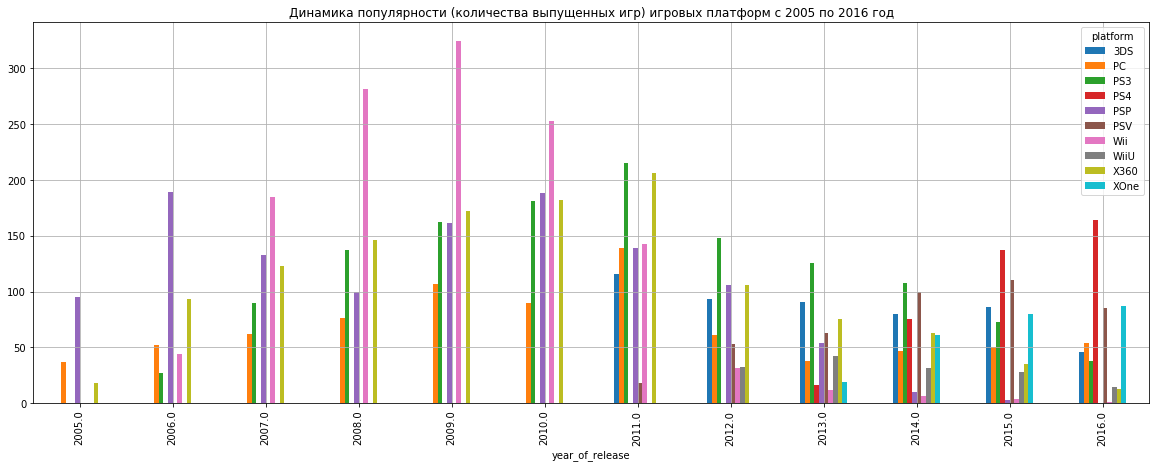

In [ ]:
platform_year_pivot = data.query('platform in @actual_platforms_list and year_of_release >= 2005').pivot_table(index='year_of_release', values='name', columns='platform', aggfunc='count')
platform_year_pivot.pivot_table(index='year_of_release', values=['PS4', 'PSV', '3DS', 'XOne', 'PS3', 'PC', 'X360', 'WiiU', 'Wii', 'PSP'], aggfunc='sum').plot(kind='bar', figsize=(20,7), grid=True, title='Динамика популярности (количества выпущенных игр) игровых платформ с 2005 по 2016 год') 

Мы видим пик популярности Wii в 2008-2009 годах и его последующий спад, стабильно существующих на рынке Sony, меняющих свои приставки, для которых в последние годы выпускается большинство игр. Рост до 2011, потом спад популярности Xbox, который снова стал набирать популярность с новой приставкой в 2013 году. 

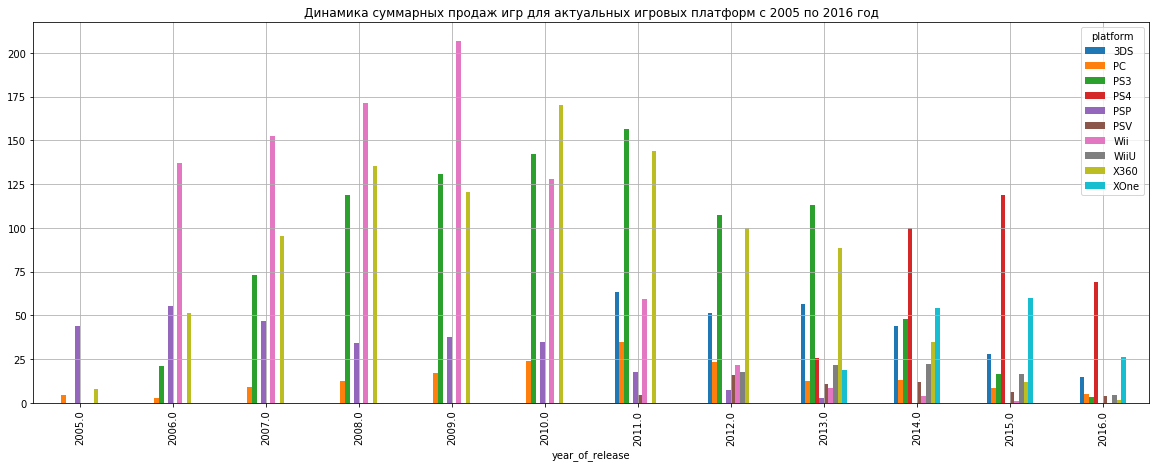

In [ ]:
platform_year_pivot = data.query('platform in @actual_platforms_list and year_of_release >= 2005').pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
platform_year_pivot.pivot_table(index='year_of_release', values=['PS4', 'PSV', '3DS', 'XOne', 'PS3', 'PC', 'X360', 'WiiU', 'Wii', 'PSP'], aggfunc='sum').plot(kind='bar', figsize=(20,7), grid=True, title='Динамика суммарных продаж игр для актуальных игровых платформ с 2005 по 2016 год') 

В продажах ежегодно присутствует 2-3 лидера. И если вплоть до 2009 года большинство игр продавали Nintendo, то потом лидером на год стал Xbox, быстро уступив Sony, которые держат большинств продаж до сих пор (то есть до 2016 года).

Все актуальные платформы, кроме PC (у которых много производителей, характеристик и операционных систем), можно объединить в категории по производителю - Sony Playstation, Nintendo, Microsoft Xbox.

In [ ]:
def firm_cat(row):
    if row == 'XOne' or row == 'X360':
        return 'Xbox'
    elif row == 'PS4' or row == 'PSV' or row == 'PS3' or row == 'PSP':
        return 'PS'
    elif row == 'WiiU' or row == 'Wii' or row == '3DS':
        return 'Nintendo'
    elif row == 'PC':
        return 'diff_PC'
    else:
        return 'not actual platform'
data['actual_firm'] = data['platform'].apply(firm_cat)
data['actual_firm'].value_counts()

not actual platform    8880
PS                     3361
Nintendo               1987
Xbox                   1509
diff_PC                 974
Name: actual_firm, dtype: int64

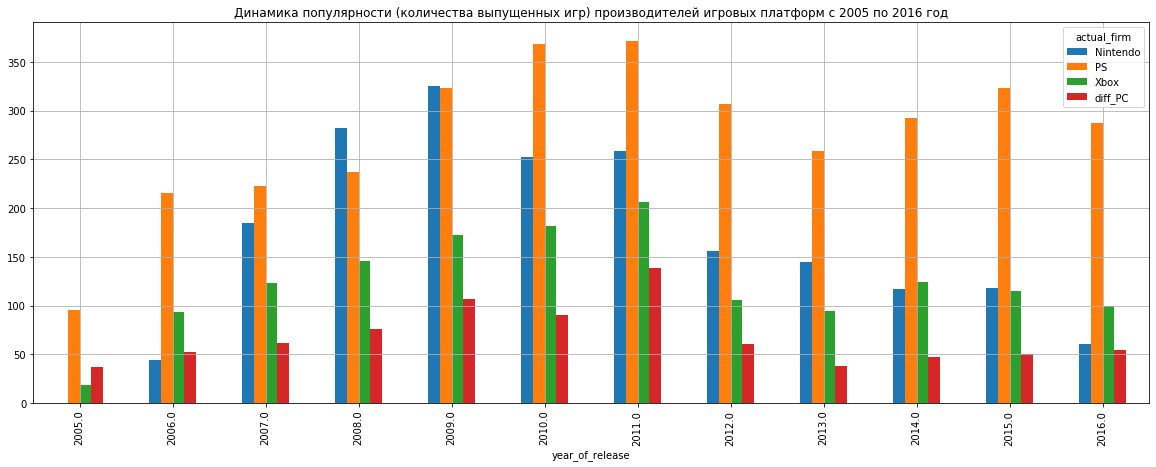

In [ ]:
data.query('platform in @actual_platforms_list and year_of_release >= 2005').pivot_table(index='year_of_release', values='name', columns='actual_firm', aggfunc='count').pivot_table(index='year_of_release', values=['PS', 'Nintendo', 'Xbox', 'diff_PC'], aggfunc='sum').plot(kind='bar', figsize=(20,7), grid=True, title='Динамика популярности (количества выпущенных игр) производителей игровых платформ с 2005 по 2016 год')

Когда все Playstation оказались в одной категории, хорошо видно, что подавляющее большинство игр с 2010 года производится для приставок Sony.

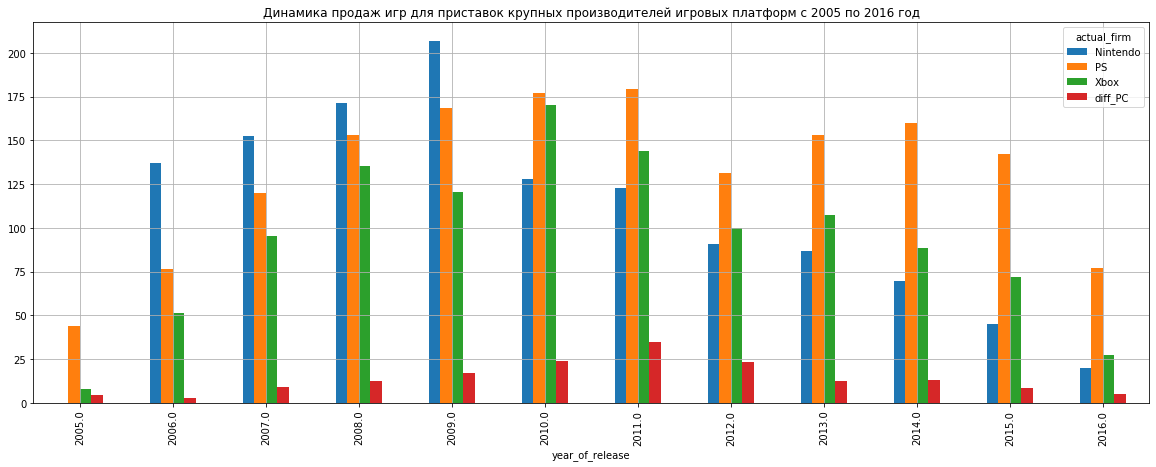

In [ ]:
data.query('platform in @actual_platforms_list and year_of_release >= 2005').pivot_table(index='year_of_release', values='total_sales', columns='actual_firm', aggfunc='sum').pivot_table(index='year_of_release', values=['PS', 'Nintendo', 'Xbox', 'diff_PC'], aggfunc='sum').plot(kind='bar', figsize=(20,7), grid=True, title='Динамика продаж игр для приставок крупных производителей игровых платформ с 2005 по 2016 год')

До 2010 года лидерами продаж были Nintendo, но в 2010 их обогнали Sony и Xbox, ну а потом Sony стали однозначными лидерами. 

Теперь посмотрим на платформы, для которых игры больше не выпускают - как долго они существовали. Можно было бы отнять от последнего года существования платформы первый, но тогда всю картину испортит DS, для которой была выпущена игра в 1985 году, а следующая в 2004 (для уже, очевидно, обновленной платформы).

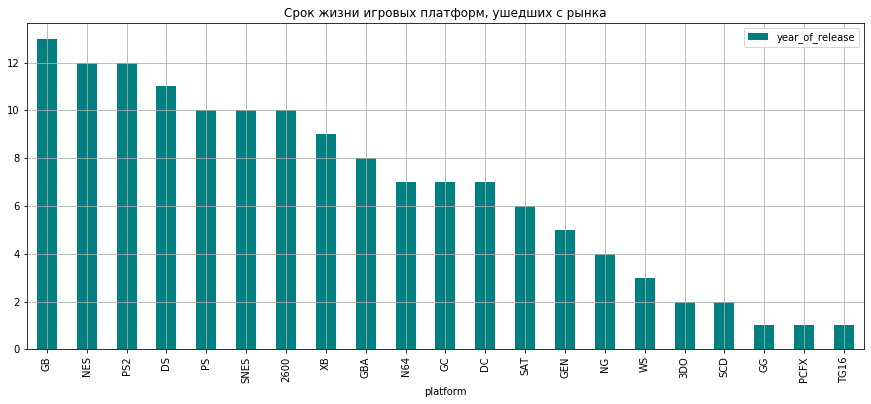

In [ ]:
data_pivot_year_not_actual_platform = data.query('actual_firm == "not actual platform"').pivot_table(index=['year_of_release', 'platform'], values='name', aggfunc='count').reset_index()
data_pivot_year_not_actual_platform.pivot_table(index='platform', values='year_of_release', aggfunc='count').sort_values(by='year_of_release', ascending=False).plot(kind='bar', figsize=(15,6), grid=True, color='teal', title='Срок жизни игровых платформ, ушедших с рынка')

В лидерах Game Boy от Nintendo, NES от Nintendo, PS2 от Sony, DS от Nintendo - продержались на рынке больше 10 лет. 

Посмотрим как долго присутствуют на рынке игровые платформы, для которых игры ещё выпускают. 

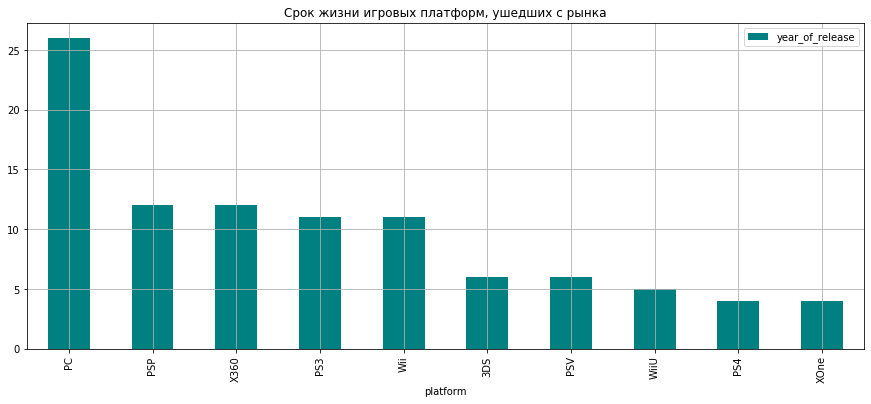

In [ ]:
data_pivot_year_actual_platform = data.query('actual_firm != "not actual platform"').pivot_table(index=['year_of_release', 'platform'], values='name', aggfunc='count').reset_index()
data_pivot_year_actual_platform.pivot_table(index='platform', values='year_of_release', aggfunc='count').sort_values(by='year_of_release', ascending=False).plot(kind='bar', figsize=(15,6), grid=True, color='teal', title='Срок жизни игровых платформ, ушедших с рынка')

Важно понимать, что PC не является одной игровой платформой на протяжении всех этих лет (сравним первые персональные компьютеры с современными). Уверенные лидеры сменяются новыми приставками от тех же производителей (PS3 - PS4, X360 - XOne, Wii - WiiU, PSP - PSV), то есть вся троица - Sony, Xbox и Nintendo - продолжает борьбу за место под солнцем, но Nintendo пока сдаёт позиции в мировых продажах. PC вне конкуренции, и очевидно, прекращать существование не намерен. <div class="alert alert-info">Есть сомнение насчёт грядущего успеха PSP и PSV, так как с ними серьёзно конкурируют смартфоны, количество выпускаемых игр большое, но продажи падают.</div>
Из предыдущих диаграмм: доля этих трех компаний на рынке примерно стабильна (и продажи падают), количество выпускаемых игр падает у Nintendo, стабильно у Xbox и у Sony(лидирует). То есть потенциально выгодными мы признаём PS4 (на основе успеха PS3) и XOne (на основе успеха X360) и PC (и смартфоны, которых нет в датасете). Nintendo со счетов тоже не стоит сбрасывать. Однако, 3DS на рынке 6 лет, WiiU - 5, продажи падают. Возможно, надо посмотреть региональные продажи.


А теперь посмотрим как долго присутствуют на рынке игровые платформы, для которых игры ещё выпускают, посчитаем средний срок существования на рынке актуальных игровых платформ (исключив PC, на котором в нашем датасете играют с 1985 года) и средний срок службы приставки в целом по всему датасету, то есть по уже отжившим своё и продолжающим существование на момент анализа, исключив PC.


In [ ]:
print('Средний срок жизни игровой платформы, уже ушедшей с рынка:', data_pivot_year_not_actual_platform.pivot_table(index='platform', values='year_of_release', aggfunc='count')['year_of_release'].mean())
data_pivot_year_actual_platform = data.query('actual_firm != "not actual platform" and platform != "PC"').pivot_table(index=['year_of_release', 'platform'], values='name', aggfunc='count').reset_index()
print('Средний срок присутствия на рынке актуальной игровой платформы (кроме PC):', data_pivot_year_actual_platform.pivot_table(index='platform', values='year_of_release', aggfunc='count')['year_of_release'].mean())
print('Средний срок присутствия на рынке всех игровых платформ из датасета (кроме PC):', data.query('platform != "PC"').pivot_table(index=['year_of_release', 'platform'], values='name', aggfunc='count').reset_index().pivot_table(index='platform', values='year_of_release', aggfunc='count')['year_of_release'].mean())

Средний срок жизни игровой платформы, уже ушедшей с рынка: 6.714285714285714
Средний срок присутствия на рынке актуальной игровой платформы (кроме PC): 7.888888888888889
Средний срок присутствия на рынке всех игровых платформ из датасета (кроме PC): 7.066666666666666


<div class="alert alert-info">Средний срок жизни консоли 6.7 лет, если рассматривать те игровые платформы, для которых игры уже не выпускают. Однако, если мы посмотрим на средний срок присутствия на рынке платформ, срок службы которых ещё не завершён, то увидим, что он уже больше - 7.8 лет. Можем предположить тенденцию к росту продолжительности жизни консоли.</div> 

<div class="alert alert-info">
Мы определили актуальные платформы. Теперь нам предстоим выделить период, который мы возьмём для анализа. 
На графиках выделяется два периода, с которых начинается рост количества игр и рост продаж: 2013-2016 и 2005-2016.
Вся четверка на рынке вместе с 2006 года. Однако, если смотреть по отдельным платформам, которые актуальны на момент создания датасета, - все 10 на рынке с 2013 года.</div> 

In [ ]:
len(data.query('year_of_release >= 2013'))

2233

<div class="alert alert-info">Выбираем в качестве актуального период с 2013 года - здесь мы наблюдаем динамику продаж игр для существующих на сегодняшний день платформ.</div>

In [ ]:
actual_data = data.query('year_of_release >= 2013')

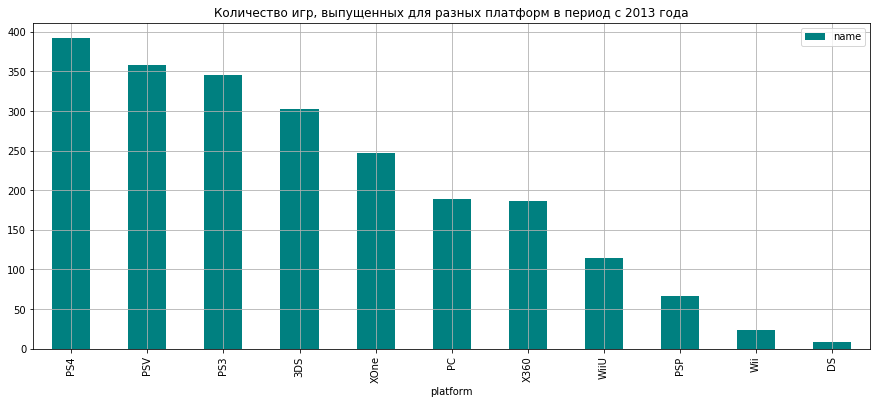

In [ ]:
actual_data.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name', ascending=False).plot(kind='bar', figsize=(15,6), grid=True, color='teal',  title='Количество игр, выпущенных для разных платформ в период с 2013 года')

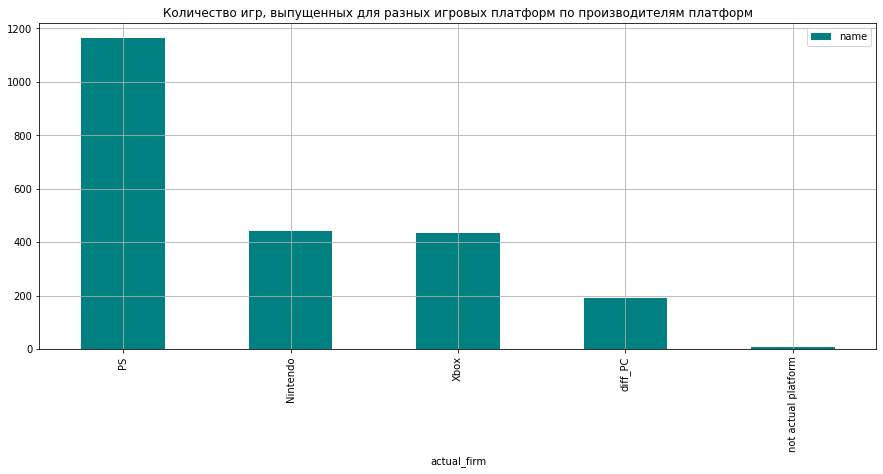

In [ ]:
actual_data.pivot_table(index='actual_firm', values='name', aggfunc='count').sort_values(by='name', ascending=False).plot(kind='bar', figsize=(15,6), grid=True, color='teal',  title='Количество игр, выпущенных для разных игровых платформ по производителям платформ')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5258350110>],
      dtype=object)

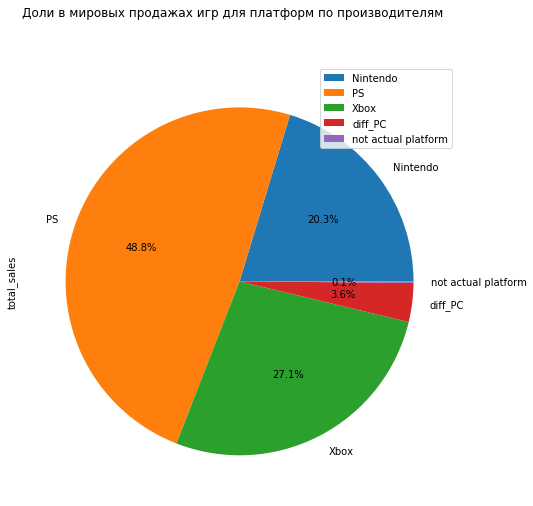

In [ ]:
actual_data.pivot_table(index='actual_firm', values='total_sales', aggfunc='sum').plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(8,8), grid=True,  title='Доли в мировых продажах игр для платформ по производителям')

В суммарных мировых продажах и количестве выпущенных игр за выбранный нами период лидирует Playstation. Xbox и Nintendo так же занимаю приличную долю рынка, их доли сравнимы друг с другом. Доля продаж игр для PC невелика, но стабильна.

### Распределения продаж по платформам

Посмотрим, как распределены относительно друг друга продажи игр для актуальных игровых платформ.

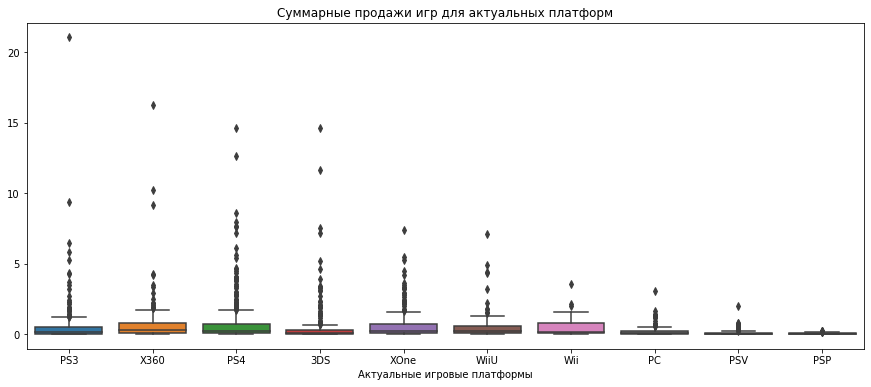

In [ ]:
plt.figure(figsize=(15,6))

sns.boxplot(x='platform', y='total_sales', data=actual_data.query('actual_firm != "not actual platform"'))
plt.xlabel('Актуальные игровые платформы')
plt.ylabel('')
plt.title('Суммарные продажи игр для актуальных платформ')
plt.show()

Ещё когда мы просматривали данные, мы не могли их разглядеть из-за слишком высоких продаж отдельных игр (например одной игры для wii в 2008-2009) годах. Посмотрим, убрав такие выбросы.

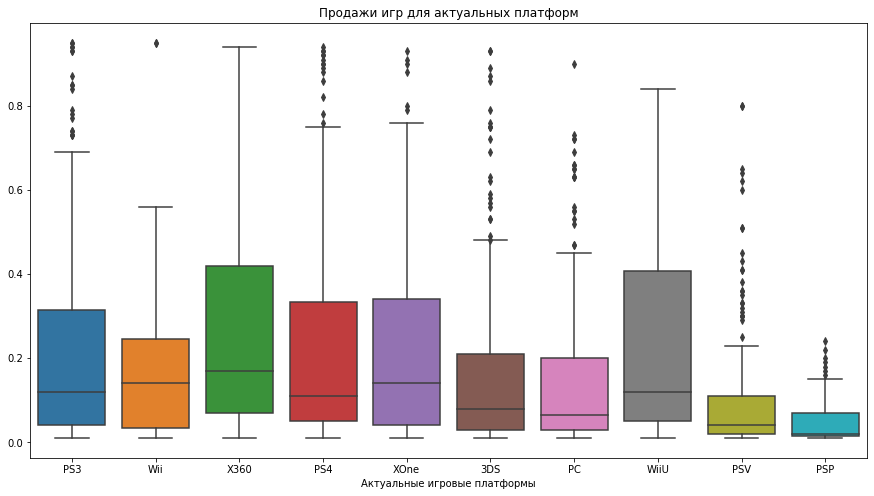

In [ ]:
total_sales_r_border = actual_data.query('actual_firm != "not actual platform"')['total_sales'].quantile(0.75) + (actual_data.query('actual_firm != "not actual platform"')['total_sales'].quantile(0.75) - actual_data.query('actual_firm != "not actual platform"')['total_sales'].quantile(0.25))*1.5
plt.figure(figsize=(15,8))
sns.boxplot(x='platform', y='total_sales', data=actual_data.query('actual_firm != "not actual platform" and total_sales < @total_sales_r_border'))
plt.xlabel('Актуальные игровые платформы')
plt.ylabel('')
plt.title('Продажи игр для актуальных платформ')
plt.show()

<div class="alert alert-info">
Все распределения смещены вправо, то есть существенна разница между средним и медианой. Если судить по медианным продажам, то в лидерах X360, XOne и Wii. Их догоняет PS3. Размах больше у X360 и WiiU, за ними PS3, XOne и PS4 - самый большой объем продаж игр для этих платформ.</div>

In [ ]:
actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


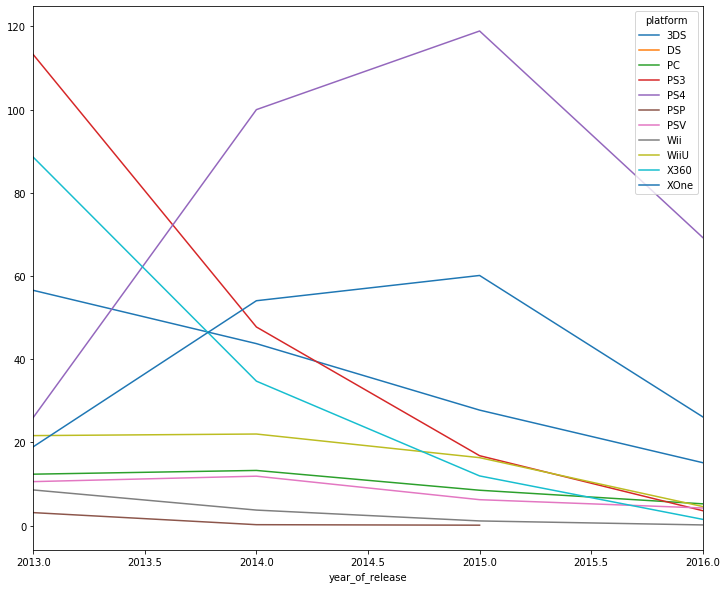

In [ ]:
actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(12,10))

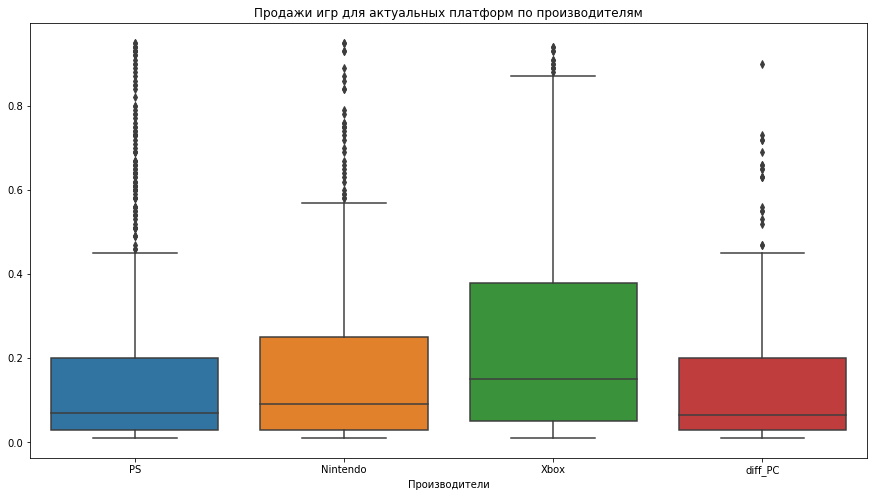

In [ ]:
total_sales_r_border = actual_data.query('actual_firm != "not actual platform"')['total_sales'].quantile(0.75) + (actual_data.query('actual_firm != "not actual platform"')['total_sales'].quantile(0.75) - actual_data.query('actual_firm != "not actual platform"')['total_sales'].quantile(0.25))*1.5
plt.figure(figsize=(15,8))
sns.boxplot(x='actual_firm', y='total_sales', data=actual_data.query('actual_firm != "not actual platform" and total_sales < @total_sales_r_border'))
plt.xlabel('Производители')
plt.ylabel('')
plt.title('Продажи игр для актуальных платформ по производителям')
plt.show()

Если смотреть по производителям игровых платформ, то видно, что медианные продажи и размах больше у Xbox. Все распределения смещены вправо.

### Влияние на продажи оценок критиков и игроков

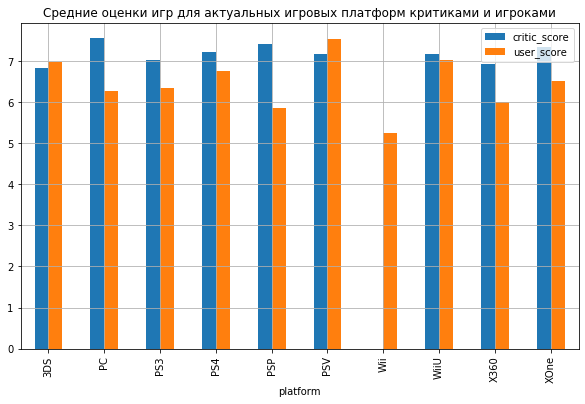

In [ ]:
actual_data.query('actual_firm != "not actual platform"').pivot_table(index='platform', values=['critic_score', 'user_score']).plot(kind='bar', figsize=(10,6), grid=True,  title='Средние оценки игр для актуальных игровых платформ критиками и игроками')

<div class="alert alert-info">
Оценки критиков, как правило, выше оценок игроков. Обратное верно только в случае PSV и 3DS. Средние оценки игроков выходят за 7 баллов для PSV и 3DS. Игры для Wii критики вообще не оценивали, а оценки пользователей самый низкие.</div>

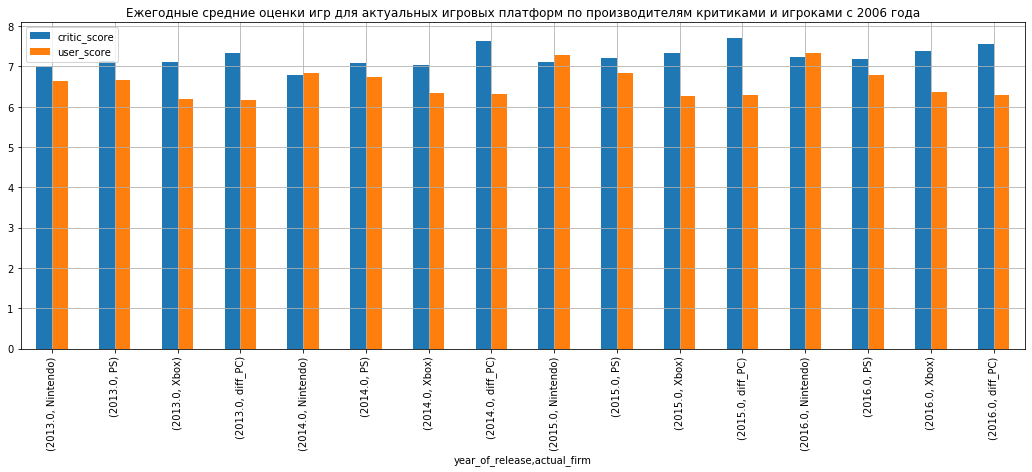

In [ ]:
actual_data.query('actual_firm != "not actual platform"').pivot_table(index= ['year_of_release','actual_firm'], values=['critic_score', 'user_score']).plot(kind='bar', figsize=(18,6), grid=True,  title='Ежегодные средние оценки игр для актуальных игровых платформ по производителям критиками и игроками с 2006 года')

При визульной оценке динамики оценок игр для различных платформ с 2006 года, есть впечатление, что увеличивается разрыв в средней оценке игроков и критиков. Вероятно, потребителя стало трудно удивить.

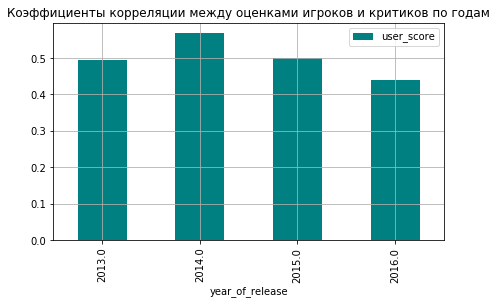

In [ ]:
corr_table = actual_data.query('actual_firm != "not actual platform"').pivot_table(index= 'year_of_release', values=['critic_score', 'user_score'], aggfunc='corr').reset_index()
corr_table.query('user_score < 1')[['year_of_release', 'user_score']].set_index('year_of_release').plot(kind='bar', figsize=(7,4), grid=True, color='teal', title='Коэффициенты корреляции между оценками игроков и критиков по годам')

Сравнение корреляций так же показывает, что со временем оценки игроков и критиков расходятся всё больше.

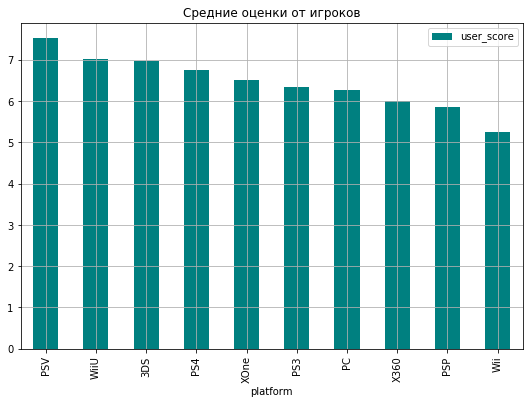

In [ ]:
actual_data.query('actual_firm != "not actual platform"').pivot_table(index='platform', values='user_score').sort_values(by='user_score', ascending=False).plot(kind='bar', figsize=(9,6), grid=True, color='teal', title='Средние оценки от игроков')

<div class="alert alert-info">Средние оценки игроков расположились в диапазоне от 5.5 до 7.5 баллов. Выше всего оценили игры для PSV и WiiU - у них средняя оценка выше 7 баллов. Будет интересно сравнить пользовательский рейтинг платформ, которые мы сочли перспективными - PS4, XOne и PC.</div>

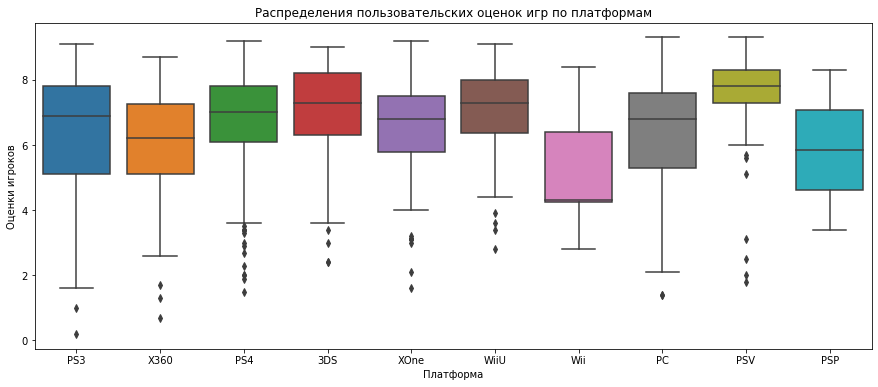

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(y='user_score', x='platform', data=actual_data.query('actual_firm != "not actual platform"'))
plt.xlabel('Платформа')
plt.ylabel('Оценки игроков')
plt.title('Распределения пользовательских оценок игр по платформам')
plt.show()

<div class="alert alert-info">Из рассматриваемых нами как перспективных платформ самая высокая медианная оценка игроков у PSV - ее оценивают стабильно высоко. Заметны проблемы у Wii - разницы между медианой и нижним квартилем почти не видно - 25% игроков оценивает игры всего на 4 балла. Диапазон высоких оценок у PS4, 3DS и WiiU. Медианные пользовательские оценки XOne и PC одинаковые.</div>

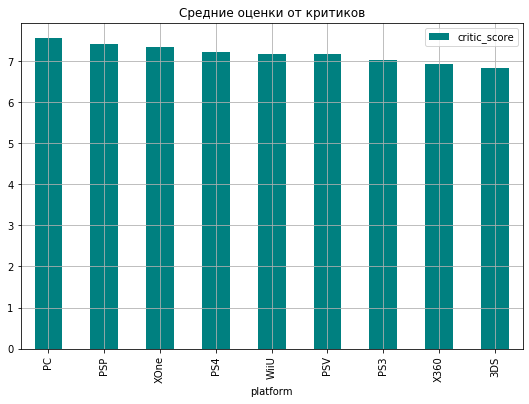

In [ ]:
actual_data.query('actual_firm != "not actual platform"').pivot_table(index='platform', values='critic_score').sort_values(by='critic_score', ascending=False).plot(kind='bar', figsize=(9,6), grid=True, color='teal', title='Средние оценки от критиков')

В рейтинге средних оценок критиков лидируют игры для PC, PSP и XOne (XOne, помним, был в хвосте рейтинга оценок от игроков).

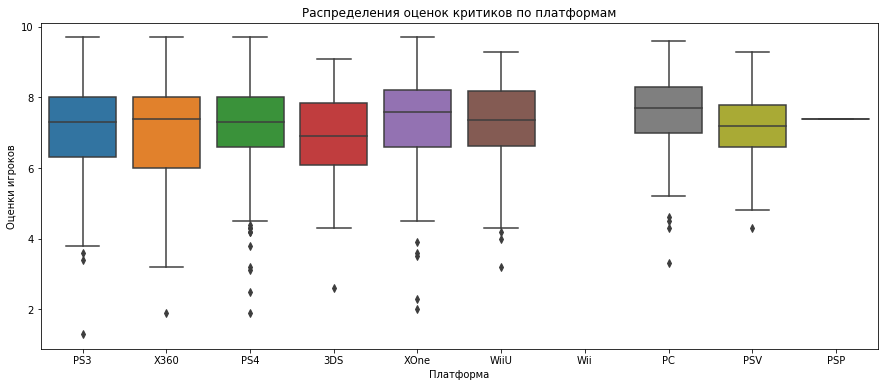

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(y='critic_score', x='platform', data=actual_data.query('actual_firm != "not actual platform"'))
plt.xlabel('Платформа')
plt.ylabel('Оценки игроков')
plt.title('Распределения оценок критиков по платформам')
plt.show()

In [ ]:
len(actual_data.query('platform == "PSP"'))

67

<div class="alert alert-info">Оценки критиков выглядят, как "под одну гребёнку", медианы составляют почти одну линию. Самая низкая медианная оценка у 3DS. У PSP всего две оценки, поэтому ящик схлопнулся.</div>

Посмотрим, влияют ли оценки критиков и игроков на продажи

<div class="alert alert-info">Для построения диаграмм рассеяния и подсчёта корреляций между оценками критиков и продажами возьмём данные без пропусков в оценках критиков (в total_sales пропусков нет)</div>

In [ ]:
critic_score_not_nan = actual_data[~actual_data['critic_score'].isna()]

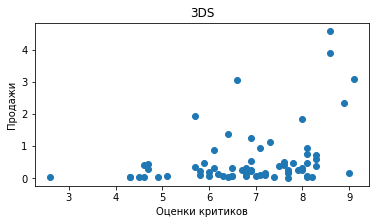

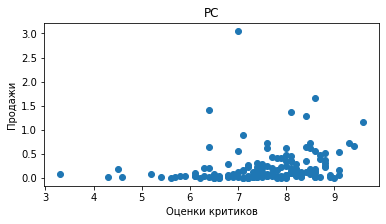

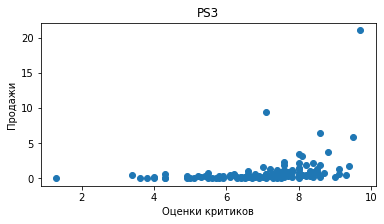

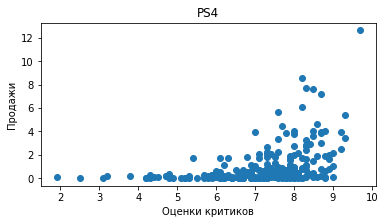

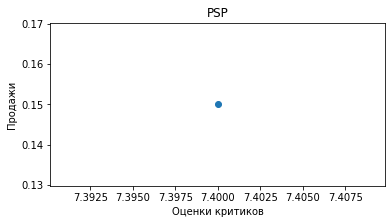

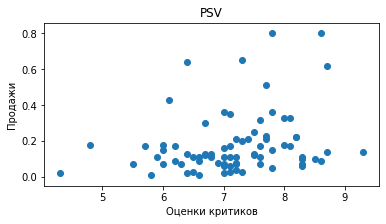

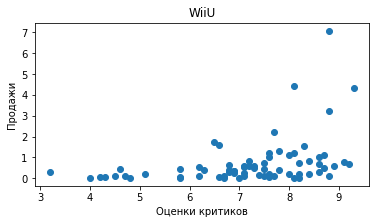

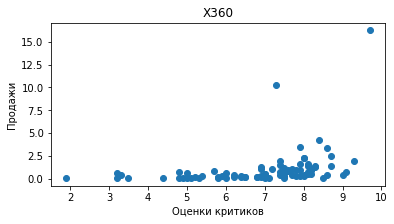

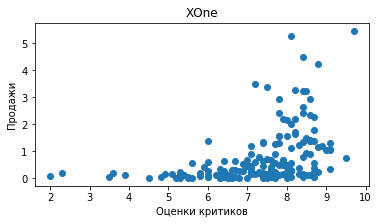

In [ ]:
for i, group_data in critic_score_not_nan.query('actual_firm != "not actual platform"').groupby('platform'):
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.scatter(x = group_data['critic_score'], y = group_data['total_sales'])
    plt.xlabel("Оценки критиков")
    plt.ylabel("Продажи")
    plt.title(i)
    plt.show()

In [ ]:
for i, group_data in critic_score_not_nan.query('actual_firm != "not actual platform"').groupby('platform'):
    print(i, group_data['critic_score'].corr(group_data['total_sales']))

3DS 0.3570566142288107
PC 0.1960302829436937
PS3 0.3342853393371917
PS4 0.4065679020617811
PSP nan
PSV 0.2547423503068658
WiiU 0.37641490654239135
X360 0.35034454602286613
XOne 0.4169983280084022


<div class="alert alert-info">Можно сказать, что линейная ависимость продаж игр от оценок критиков очень мала: в случае с PS4  и XOne она приближается к слабой зависимости, в остальных случях - отсутствует. У PSP, как мы помним, всего две оценки - не выходит посчитать корреляцию.</div>

<div class="alert alert-info">Для построения диаграмм рассеяния и подсчёта корреляций между оценками игроков и продажами возьмём данные без пропусков в оценках игроков (в total_sales пропусков нет)</div>

In [ ]:
user_score_not_nan = actual_data[~actual_data['user_score'].isna()]

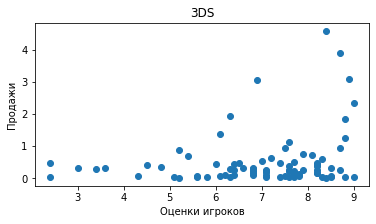

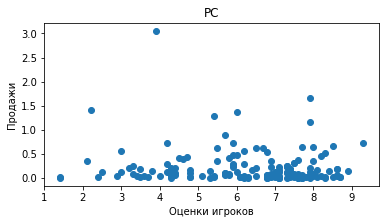

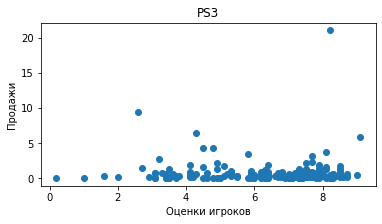

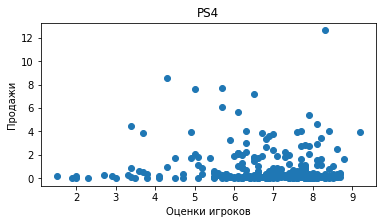

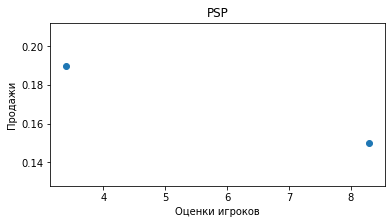

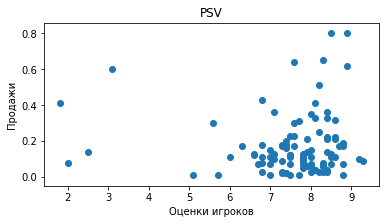

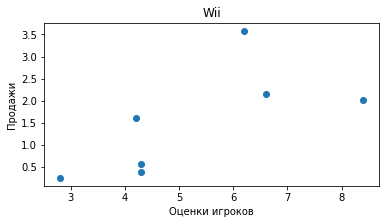

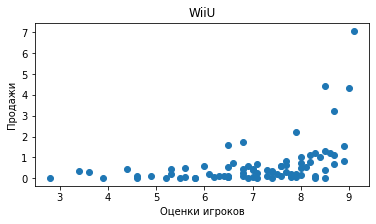

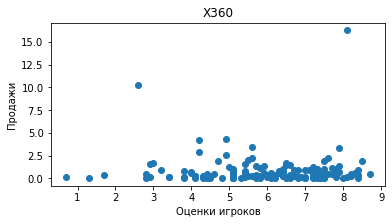

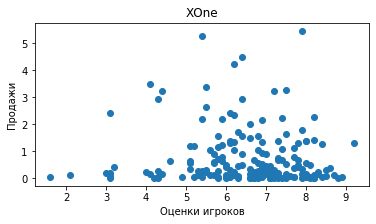

In [ ]:
for i, group_data in actual_data.query('actual_firm != "not actual platform"').groupby('platform'):
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.scatter(x = group_data['user_score'], y = group_data['total_sales'])
    plt.xlabel("Оценки игроков")
    plt.ylabel("Продажи")
    plt.title(i)
    plt.show()

In [ ]:
for i, group_data in user_score_not_nan.query('actual_firm != "not actual platform"').groupby('platform'):
    print(i, group_data['user_score'].corr(group_data['total_sales']))

3DS 0.24150411773563016
PC -0.0938418695247674
PS3 0.0023944027357566925
PS4 -0.031957110204556424
PSP -0.9999999999999999
PSV 0.0009424723319108626
Wii 0.6829417215362368
WiiU 0.4193304819266187
X360 -0.011742185147181342
XOne -0.06892505328279414


In [ ]:
print('Количество оценок игроков у Wii:', len(user_score_not_nan.query('platform == "Wii"')))
print('Коэффициент корреляции пользовательских оценок игр для Wii и продаж по всему датасету:', data.query('platform == "Wii"')[~data.query('platform == "Wii"')['user_score'].isna()]['user_score'].corr(data.query('platform == "Wii"')['total_sales']))

Количество оценок игроков у Wii: 7
Коэффициент корреляции пользовательских оценок игр для Wii и продаж по всему датасету: 0.11241436067003169


<div class="alert alert-info">
Линейной зависимости продаж игр для почти всех платформ от оценок игроков нет. Исключение составляют Wii - продажи игр для этой приставки коррелируют с оценками игроков (однако надежность такого коэффициента под вопросом -  у Wii всего 7 оценок, а если мы посмотрим на такой коэффициент по всему датасету, то он равен 0.1) - и WiiU, в случае с которой можно говорить и приближении к слабой линейной зависимости продаж от оценок.</div>

Попробуем разделить оценки на категории и посмотреть, как шли продажи в каждой из этих категорий.

In [ ]:
def critic_score_cat(row):
    if row <= actual_data['critic_score'].quantile(0.33):
        return 1
    elif actual_data['critic_score'].quantile(0.33) < row <= actual_data['critic_score'].quantile(0.66):
        return 2
    else:
        return 3
    
def user_score_cat(row):
    if row <= actual_data['user_score'].quantile(0.33):
        return 1
    elif actual_data['user_score'].quantile(0.33) < row <= actual_data['user_score'].quantile(0.66):
        return 2
    else:
        return 3
    

actual_data['critic_score_cat'] = actual_data['critic_score'].apply(critic_score_cat)
actual_data['user_score_cat'] = actual_data['user_score'].apply(user_score_cat)
print(actual_data['critic_score_cat'].value_counts())
print(actual_data['user_score_cat'].value_counts())

3    1578
1     341
2     314
Name: critic_score_cat, dtype: int64
3    1428
1     407
2     398
Name: user_score_cat, dtype: int64


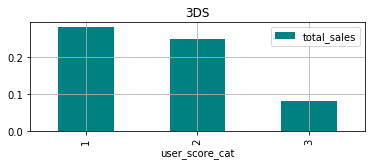

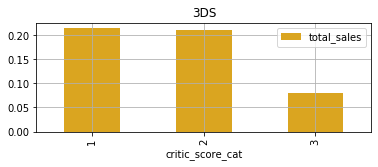

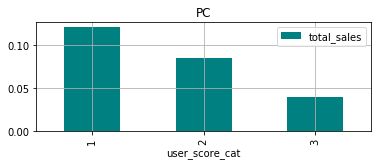

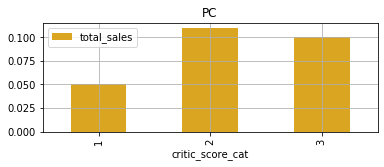

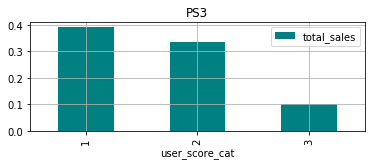

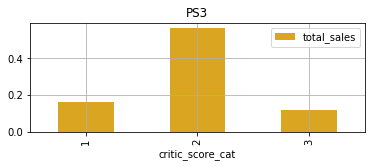

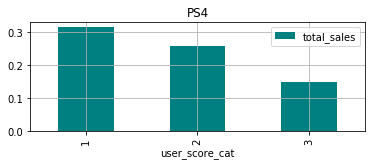

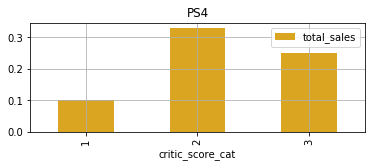

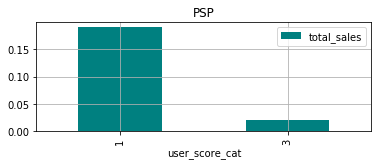

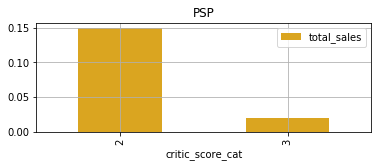

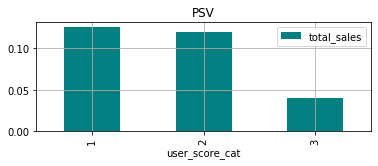

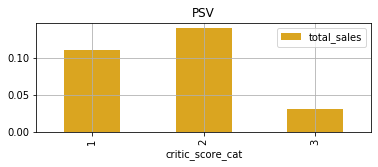

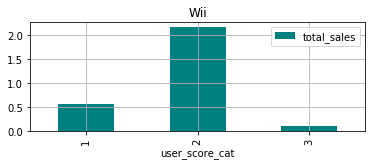

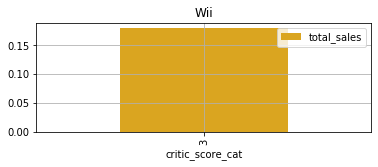

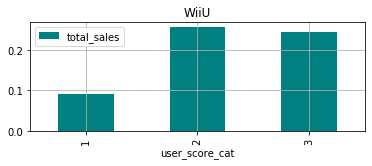

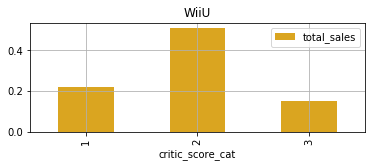

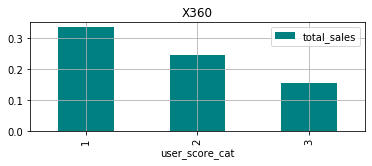

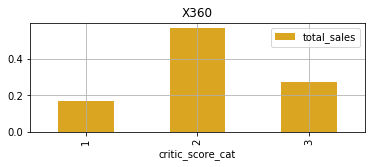

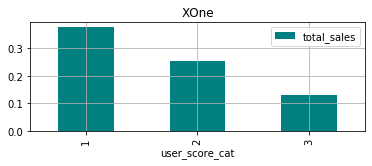

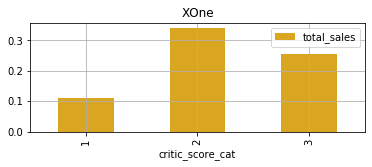

In [ ]:
for i, group_data in actual_data.query('actual_firm != "not actual platform"').groupby('platform'):
    group_data.pivot_table(index='user_score_cat', values='total_sales', aggfunc='median').plot(kind='bar', figsize=(6,2), color='teal', grid=True,  title=i)
    group_data.pivot_table(index='critic_score_cat', values='total_sales', aggfunc='median').plot(kind='bar', figsize=(6,2), color='goldenrod', grid=True,  title=i)
    plt.show()

<div class="alert alert-info">
Интересно, что в случае 3DS,  PC, PS3, PS34, X360 и XOne продажи почти обратно пропорциональны оценкам игроков (больше продано низко оцененных игр). Но с оценками критиков у PC картина обратная - с возрастанием уровня оценки растет и число продаж.
Похожая ситуация с PS4 и XOne. Можем предположить здесь какую-то степень влияния оценок критиков (особенно, если они включены в рекламу).</div>


### Распределение игр по жанрам

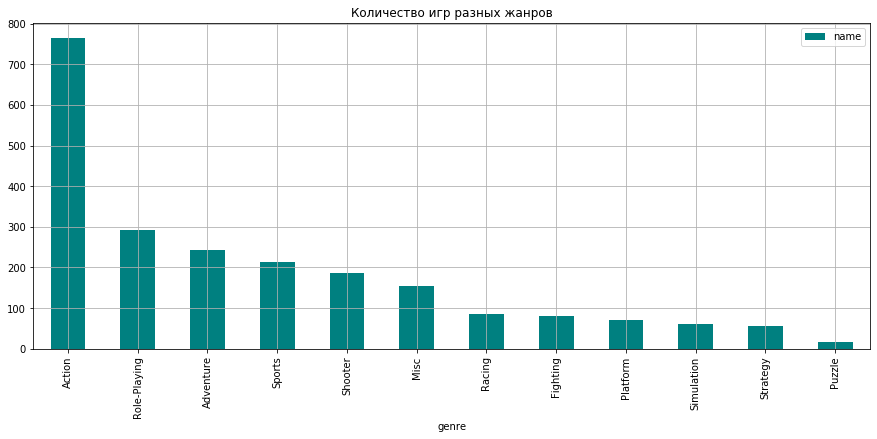

In [ ]:
actual_data.query('actual_firm != "not actual platform"').pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False).plot(kind='bar', figsize=(15,6), grid=True, color='teal',  title='Количество игр разных жанров')

Action лидирует с большим отрывом

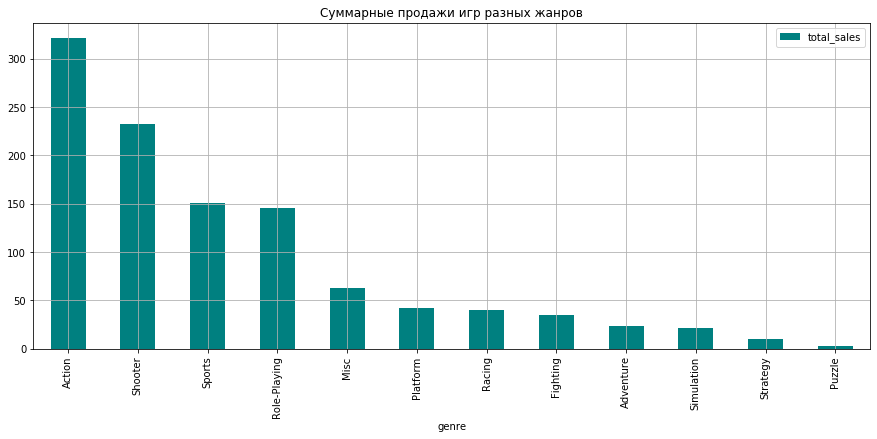

In [ ]:
actual_data.query('actual_firm != "not actual platform"').pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar', figsize=(15,6), grid=True, color='teal',  title='Суммарные продажи игр разных жанров')

По продажам в лидерах также Action, его догоняют Shooter и Sports.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efe3dd7c790>],
      dtype=object)

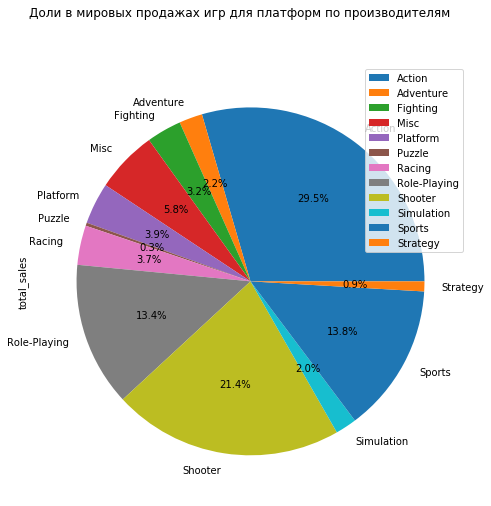

In [ ]:
actual_data.query('actual_firm != "not actual platform"').pivot_table(index='genre', values='total_sales', aggfunc='sum').plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(12,8), grid=True,  title='Доли в мировых продажах игр для платформ по производителям')

Та же информация в виде круговой диаграммы позволяет визуально оценить доли жанров на рынке. Можно сказать Action, Shooter, Sports и остальные.

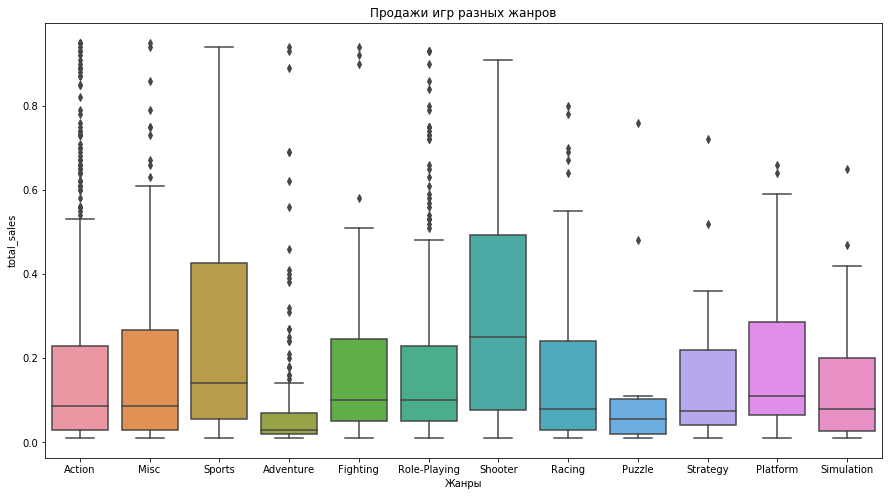

In [ ]:
total_sales_r_border = actual_data.query('actual_firm != "not actual platform"')['total_sales'].quantile(0.75) + (actual_data.query('actual_firm != "not actual platform"')['total_sales'].quantile(0.75) - actual_data.query('actual_firm != "not actual platform"')['total_sales'].quantile(0.25))*1.5
plt.figure(figsize=(15,8))
sns.boxplot(x='genre', y='total_sales', data=actual_data.query('actual_firm != "not actual platform" and total_sales < @total_sales_r_border'))
plt.xlabel('Жанры')
plt.title('Продажи игр разных жанров')
plt.show()

Медианные продажи выше у Shooter и Sports, у них же больше размах - большее количество игр продаётся в большем количестве, и речь не об отдельных популярных играх, а о жанре в целом.

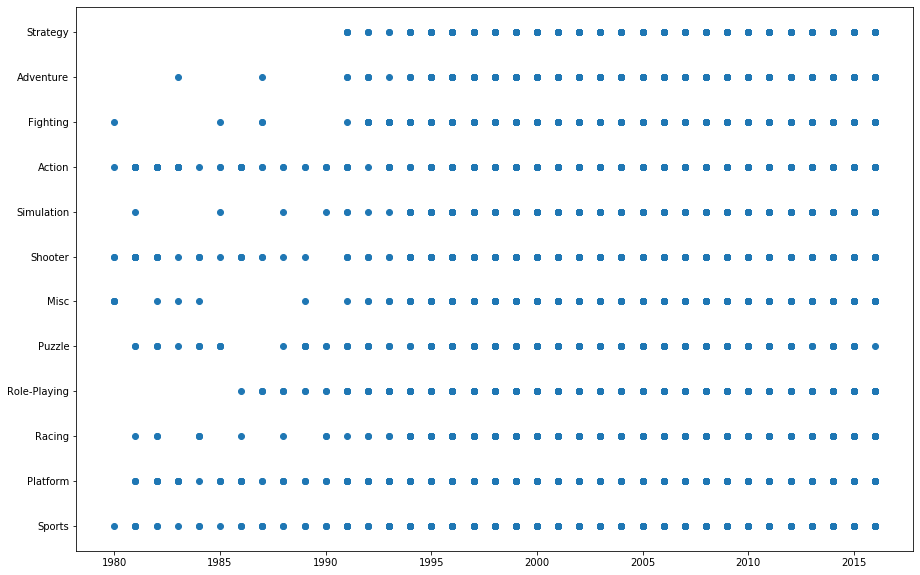

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(x = data['year_of_release'], y = data['genre'])
plt.show()

С 1991 года на рынке все представленные в нашем датасете жанры.

### Вывод

Пик выпуска игр пришёлся на 2008-2009 годы, после которых стал наблюдаться спад. Начиная с 2013 года снова видна тенденция к росту количества выпущенных игр.
C 2008-2009 года суммарные продажи игр падают (как и их выпуск).

Прожили дольше всех такие игровые платформы как: 
* персональный компьютер, 
* Game Boy от Nintendo, 
* NES от Nintendo, 
* PS2 от Sony, 
* DS от Nintendo.
Они продержались на рынке больше 10 лет, но не все эти платформы существуют до сих пор. PC не является одной игровой платформой на протяжении всех этих лет (сравним первые персональные компьютеры с современными).

Всего в нашем датасете представлено 10 платформ, для которых ежегодно продолжают выпускать игры, лидером среди которых на 2015 год является PS4: 
* PS4, 
* PSV, 
* 3DS, 
* XOne, 
* PS3, 
* PC, 
* X360, 
* WiiU, 
* Wii, 
* PSP. 

Все актуальные платформы, кроме PC (у которых много производителей, характеристик и операционных систем), можно объединить в категории по производителю: 
* Sony Playstation, 
* Nintendo, 
* Microsoft Xbox. 

Если мы посмотрим на развитие актуальных платформ, то увидим пик популярности Wii в 2008-2009 годах и его последующий спад, стабильно существующих на рынке Sony, меняющих свои приставки, для которых в последние годы выпускается большинство игр. Рост до 2011, потом спад популярности Xbox, который снова стал набирать популярность с новой приставкой в 2013 году. 
В продажах игр для платформ ежегодно присутствует 2-3 лидера. И если вплоть до 2009 года большинство игр продавали Nintendo, то потом лидером на год стал Xbox, быстро уступив Sony, которые держат большинств продаж до сих пор (то есть до 2016 года) - подавляющее большинство игр с 2010 года производится для приставок Sony.
Уверенные лидеры сменяются новыми приставками от тех же производителей (PS3 - PS4, X360 - XOne, Wii - WiiU), то есть вся троица - Sony, Xbox и Nintendo - продолжает борьбу за место под солнцем, но Nintendo пока сдаёт позиции в мировых продажах. PC вне конкуренции, и очевидно, прекращать существование не намерен. 
В среднем актуальная игровая платформа (кроме PC) существует на рынке почти 8 лет, тогда как среди уже ушедших с рынка платформ средний срок жизни составил 6.7 лет. 
Потенциально выгодными мы признаём **PS4** (на основе успеха PS3) и **XOne** (на основе успеха X360) и **PC**. 
Nintendo со счетов тоже не стоит сбрасывать (особенно в Японии). Однако, 3DS на рынке 6 лет, WiiU - 5, а продажи падают.
PC, Sony, Xbox и Nintendo на рынке вместе с 2006 года. Это момент начала активного роста количества ежегодных релизов игр и роста продаж по всему миру. Данные в период с 2006 года будем считать актуальными и подходящими для анализа.

Если судить по медианным продажам, то в лидерах PS3 и X360. Их догоняют преемники, причем у XOne дела чуть лучше, чем у PS4 (на рынке они обе 4 года). WiiU (на рынке 5 лет) по продажам (в рассматриваемом временном отрезке) обогнала Wii. Если смотреть по производителям игровых платформ, то видно, что медианные продажи и дисперсия больше у Xbox.
При вгляде на динамику оценок игр для различных платформ с 2006 года, есть впечатление, что увеличивается разрыв в средней оценке игроков и критиков. Вероятно, потребителя стало трудно удивить.
<div class="alert alert-info"> 
<b>Линейной зависимости продаж игр для разных платформ от оценок игроков и критиков нет. </b> Вероятное исключение составляют Wii.</div> При качественной оценке можно увидеть, что в случае PC продажи почти обратно пропорциональны оценкам игроков (больше продано низко оцененных игр), но с оценками критиков картина обратная - с возрастанием уровня оценки растет и число продаж. Похожая ситуация с PS4 и XOne. Мы можем предположить здесь какую-то степень влияния оценок критиков (особенно, если они включены в рекламу). Для платформы PSV уровень продаж был тем выше, чем ниже оценки игроков и критиков.

Все представленные в нашем датасете жанры существуют вместе с 1991 года.
По количеству игр **Action** лидирует с большим отрывом. По продажам в лидерах также **Action, его догоняют Shooter и Sports**.
**Медианные продажи выше у Shooter**, у них же больше размах - больше игр продаётся в большем количестве, и речь не об отдельных популярных играх, а о жанре в целом.


## Портрет пользователя каждого региона

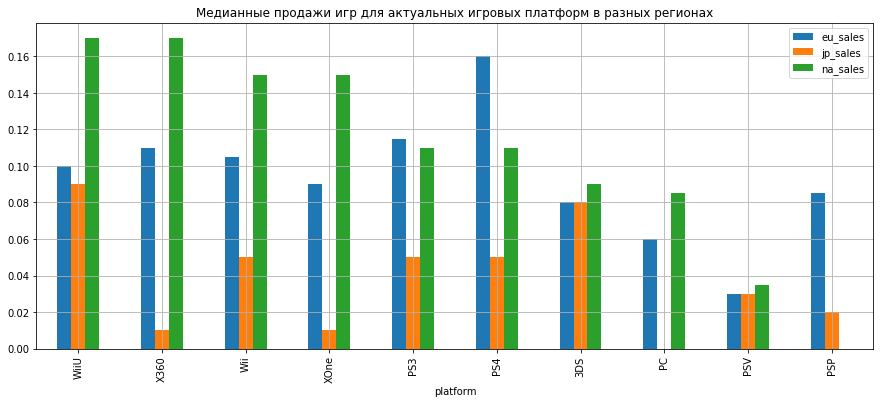

In [ ]:
actual_data.query('actual_firm != "not actual platform"').pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='median').sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(15,6), grid=True, title='Медианные продажи игр для актуальных игровых платформ в разных регионах')

Мы видим, что медианные продажи отличаются в зависимости от региона.

In [ ]:
print('Топ-5 платформ в разных регионах')
print('--Северная Америка--')
print(actual_data.query('actual_firm != "not actual platform"').pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().head(5))
print('-------Европа-------')
print(actual_data.query('actual_firm != "not actual platform"').pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().head(5))
print('-------Япония-------')
print(actual_data.query('actual_firm != "not actual platform"').pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().head(5))

Топ-5 платформ в разных регионах
--Северная Америка--
  platform  na_sales
0      PS4    108.74
1     XOne     93.12
2     X360     81.66
3      PS3     63.50
4      3DS     38.20
-------Европа-------
  platform  eu_sales
0      PS4    141.09
1      PS3     67.81
2     XOne     51.59
3     X360     42.52
4      3DS     30.96
-------Япония-------
  platform  jp_sales
0      3DS     67.81
1      PS3     23.35
2      PSV     18.59
3      PS4     15.96
4     WiiU     10.88


Мы видим, что Северная Америка и Европа очень похожи в выборе игровых платформ. Ну разве что Европа предпочитает компьютер, тогда как вместо него в американском рейтинге X360.
Японский рейтинг совсем другой. В лидерах родные Nintendo, а Xbox ни одной приставкой не вошёл в пятерку. 

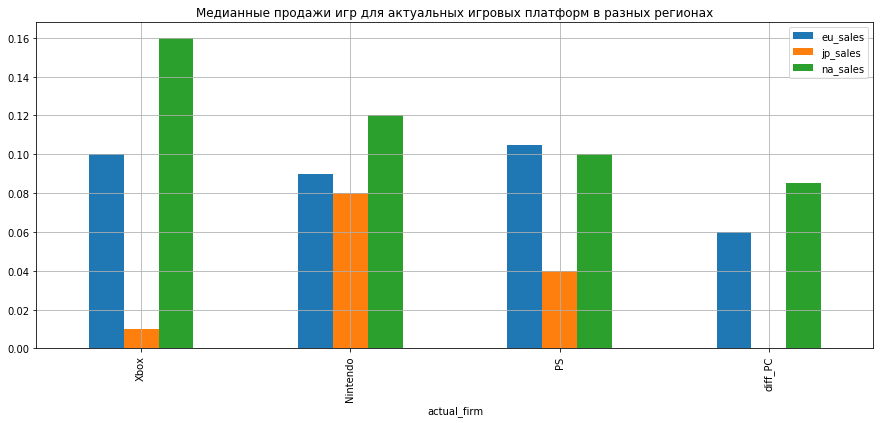

In [ ]:
actual_data.query('actual_firm != "not actual platform"').pivot_table(index='actual_firm', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='median').sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(15,6), grid=True, title='Медианные продажи игр для актуальных игровых платформ в разных регионах')

Здесь хорошо видна любовь американцев к Xbox и японцев к Nintendo (а еще то, что японцы не играют на компьютерах).

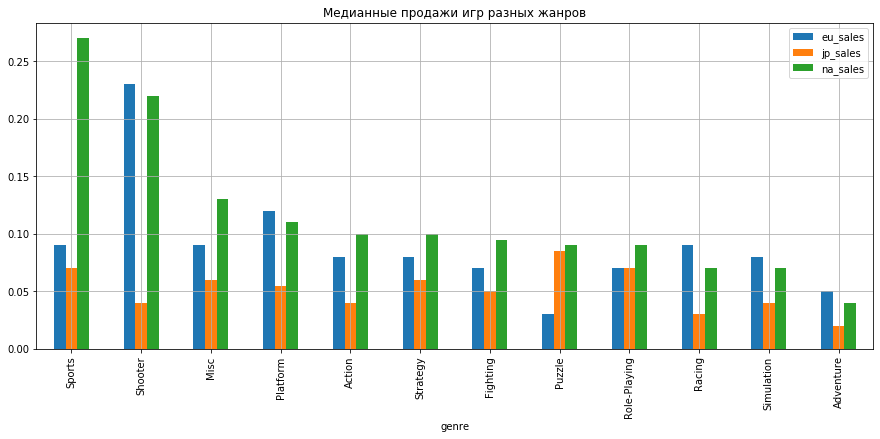

In [ ]:
actual_data.query('actual_firm != "not actual platform"').pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='median').sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(15,6), grid=True, title='Медианные продажи игр разных жанров')

Разные предпочтения в жанрах тоже заметны.

In [ ]:
print('Топ-5 жанров в разных регионах')
print('--Северная Америка--')
print(actual_data.query('actual_firm != "not actual platform"').pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().head(5))
print('-------Европа-------')
print(actual_data.query('actual_firm != "not actual platform"').pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().head(5))
print('-------Япония-------')
print(actual_data.query('actual_firm != "not actual platform"').pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().head(5))

Топ-5 жанров в разных регионах
--Северная Америка--
          genre  na_sales
0        Action    125.83
1       Shooter    109.74
2        Sports     65.27
3  Role-Playing     46.40
4          Misc     27.46
-------Европа-------
          genre  eu_sales
0        Action    117.89
1       Shooter     87.86
2        Sports     60.49
3  Role-Playing     36.97
4        Racing     20.19
-------Япония-------
          genre  jp_sales
0  Role-Playing     51.04
1        Action     40.49
2          Misc      9.20
3      Fighting      7.65
4       Shooter      6.61


И опять Америка и Европа очень похожи (отличие в одном пункте), а c Японскими игроками разница заметнее (на первом месте  Role-Playing, в пятерку вошёл Fighting)

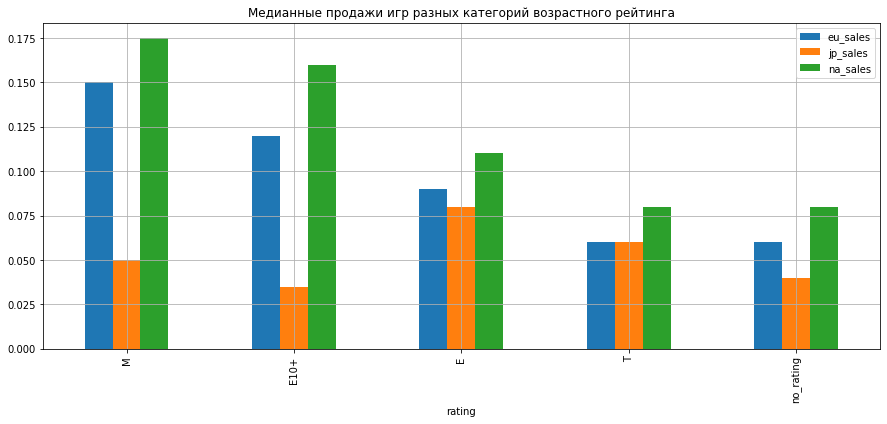

In [ ]:
actual_data.query('actual_firm != "not actual platform"').pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='median').sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(15,6), grid=True, title='Медианные продажи игр разных категорий возрастного рейтинга')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efe3c25cb10>,
      dtype=object)

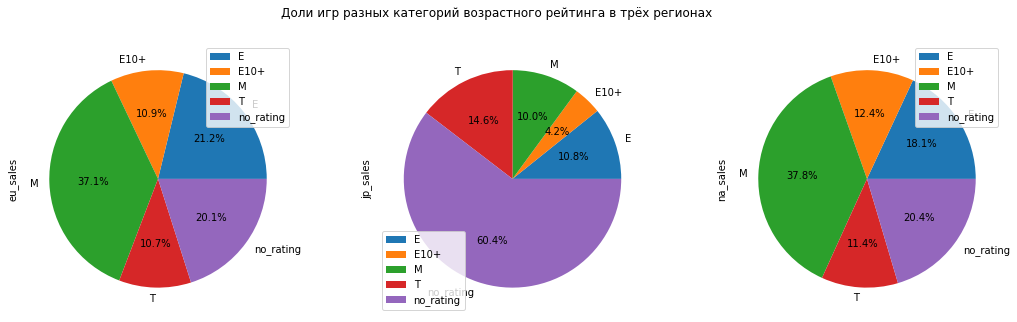

In [ ]:
actual_data.query('actual_firm != "not actual platform"').pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(18,5), grid=True,  title='Доли игр разных категорий возрастного рейтинга в трёх регионах')

<div class="alert alert-info">И снова японская картинка сильно отличается от американской и европейской гораздо меньшим объёмом категории М (17+) и E10+. Самое главное отличие в том, что больше 60% японского рынка игр вообще не имеют возрастного рейтинга, тогда как доля таких игр в Америке и Европе - 20%. Игры для детей вообще продавались только в Америке, если судить по датасету.</div>

ESRB работает только на территории СА, в Японии есть аналогичная организация: CERO. Вероятно, иностранным играм они не присваивают рейтинги, поскольку на них уже есть маркировка. Так что вполне возможно, что часть игр - это продукция Японии или же это корейские игры (там тоже своя организация). С другой стороны, раз они продают игры на своем рынке, то присвоение рейтинга может быть обязательным. Значит, дело еще может быть в том, что наша таблица - это склейка двух таблиц: продажи на Западе и на Востоке.

In [ ]:
actual_data.query('actual_firm != "not actual platform"').pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='median')

,eu_sales,jp_sales,na_sales
rating,,,
E,0.09,0.080,0.110
E10+,0.12,0.035,0.160
M,0.15,0.050,0.175
T,0.06,0.060,0.080
no_rating,0.06,0.040,0.080


<div class="alert alert-info">Вот отличия в медианных продажах в цифрах. Категории М  и E10+ у Японцев в несколько раз меньше, чем у остальных, тогда как медианные продажи игр без рейтинга высоки.</div>

### Вывод

**Средний американский игрок** предпочитает одну из пяти платформ: X360, Wii, PS3,  PS4, XOne, и один их пяти игровых жанров: Action, Shooter, Sports, Misc, Role-Playing. Играет в игры для всех возрастных категорий или в игры для взрослых, единственный покупает развивающие игры для своих маленьких детей. Подросшие американские дети тоже играют в соостветвующие возрасту игры. 

**Средний европейский игрок** очень похож на американского, но отдает предпочтение скорее Playstation, чем Xbox, и любит компьютерные игры. Развивающие игры для детей не покупает, но подросшие дети активно играют в соответствующие возрасту игры.

**Средний японский игрок** сильно оличается от американского и европейского. Любит Nintendo и Playstation(3DS, PS3, PSP, Wii, PSV), <div class="alert alert-info">чаще покупает игры, которым не присвоен возрастной рейтинг</div>, вообще не играет на компьютере, не покупает развивающих игр малышам, а подросшие дети играют меньше, чем американские и европейские. Топ любимых жанров тоже отличается, на первом месте Role-Playing, затем Action, Sports, Misc и Platform.

## Проверка гипотез

### Подготовка данных

Мы хотим проверить гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Для статистической проверки гипотез подготовим данные. Избавимся от пропусков в оценках игроков.

In [ ]:
actual_data = actual_data[~actual_data['user_score'].isna()]
actual_data['user_score'].isna().sum()

0

Вспомним, как выглядят распределения, и избавимся от выбросов.

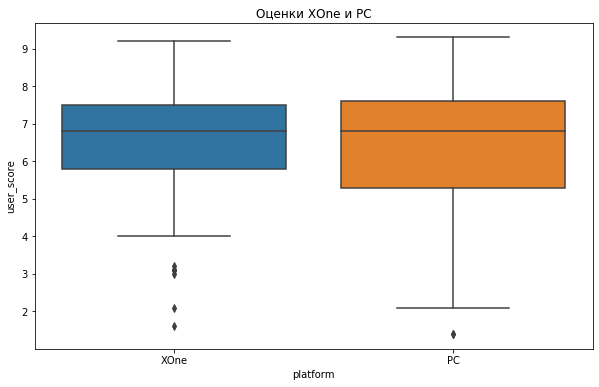

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='platform', y='user_score', data=actual_data.query('platform == "XOne" or platform == "PC"'))
plt.title('Оценки XOne и PC')
plt.show()

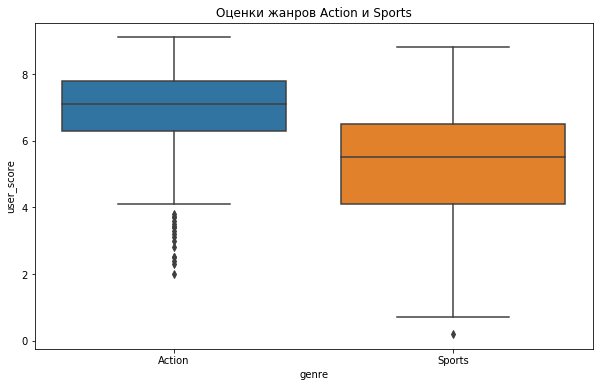

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='genre', y='user_score', data=actual_data.query('genre == "Action" or genre == "Sports"'))
plt.title('Оценки жанров Action и Sports')
plt.show()

In [ ]:
user_score_r_border = actual_data['user_score'].quantile(0.75) + (actual_data['user_score'].quantile(0.75) - actual_data['user_score'].quantile(0.25))*1.5
user_score_l_border = actual_data['user_score'].quantile(0.25) - (actual_data['user_score'].quantile(0.75) - actual_data['user_score'].quantile(0.25))*1.5
actual_data_user_score = actual_data[(actual_data['user_score'] > user_score_l_border) & (actual_data['user_score'] < user_score_r_border)]

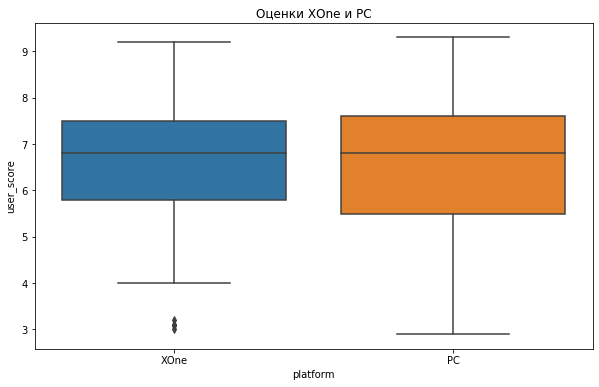

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='platform', y='user_score', data=actual_data_user_score.query('platform == "XOne" or platform == "PC"'))
plt.title('Оценки XOne и PC')
plt.show()

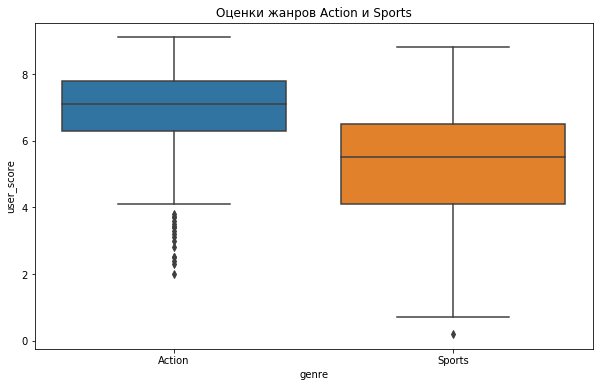

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='genre', y='user_score', data=actual_data.query('genre == "Action" or genre == "Sports"'))
plt.title('Оценки жанров Action и Sports')
plt.show()

Для выбора статистического критерия сравним дисперсии. 

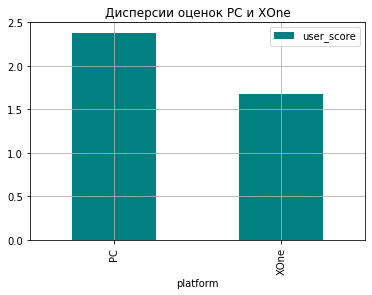

In [ ]:
actual_data_user_score.query('platform == "XOne" or platform == "PC"').pivot_table(index='platform', values='user_score', aggfunc='var').plot(kind='bar', figsize=(6,4), grid=True, color='teal',  title='Дисперсии оценок PC и XOne')

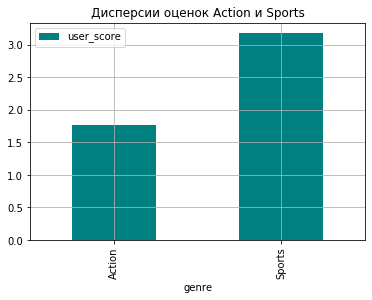

In [ ]:
actual_data.query('genre == "Action" or genre == "Sports"').pivot_table(index='genre', values='user_score', aggfunc='var').plot(kind='bar', figsize=(6,4), grid=True, color='teal',  title='Дисперсии оценок Action и Sports')

In [ ]:
print('Дисперсия оценок игр для XOne:', actual_data.query('platform == "XOne"')['user_score'].var(ddof=1))
print('Дисперсия оценок игр для PC:', actual_data.query('platform == "PC"')['user_score'].var(ddof=1))

Дисперсия оценок игр для XOne: 1.9069968429360695
Дисперсия оценок игр для PC: 3.035892752408882


In [ ]:
print('Дисперсия оценок игр жанра Action:', actual_data.query('genre == "Action"')['user_score'].var(ddof=1))
print('Дисперсия оценок игра жанра Sports:', actual_data.query('genre == "Sports"')['user_score'].var(ddof=1))

Дисперсия оценок игр жанра Action: 1.7693609042482705
Дисперсия оценок игра жанра Sports: 3.180612814465409


Дисперсии отличаются, а значит, что для сравнения двух независимых выборок нам доступен t-критерий Велча, который не предполагает равных дисперсий. 

### Проверка гипотез

#### Сформулируем гипотезы о платформах:
* H0: Средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимого различия
* H1: Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо различаются

In [ ]:
alpha = 0.05

results = st.ttest_ind(
    actual_data.query('platform == "XOne"')['user_score'], 
    actual_data.query('platform == "PC"')['user_score'], equal_var=True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем гипотезу H0")
else:
    print("Не получилось гипотезу H0")

p-значение: 0.14012658403611647
Не получилось гипотезу H0


<div class="alert alert-info">С вероятностью 0.95 средние пользовательские рейтинги платформ Xbox One и PC  не отличаются. </div>

#### Сформулируем гипотезы о жанрах:
* H0: Средние пользовательские рейтинги жанров Action и Sports не имеют статистически значимого различия
* H1: Средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются

In [ ]:
alpha = 0.05

results = st.ttest_ind(
    actual_data.query('genre == "Action"')['user_score'], 
    actual_data.query('genre == "Sports"')['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем гипотезу H0")
else:
    print("Не получилось отвергнуть гипотезу H0")

p-значение: 1.4460039700704315e-20
Отвергаем гипотезу H0


С вероятностью 0.95 средние пользовательские рейтинги жанров Action и Sports различаются.

### Вывод

<div class="alert alert-info">С высокой степенью вероятности пользовательские оценки игр для Xbox One и PC статистически значимо не различаются. 
Также с высокой вероятностью средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются. Action в среднем оценивают выше.</div>


## Общий вывод

В предоставленных данных присутствует десять платформ, актуальных на сегодняшний день (на 2016 год):
*	PS4, 
*	PSV, 
*	3DS, 
*	XOne, 
*	PS3, 
*	PC, 
*	X360, 
*	WiiU, 
*	Wii, 
*	PSP. 

Из них **потенциально выгодными мы признаём PS4, XOne и PC**. Однако, учитываем популярность приставок Nintendo в Японии и не упавшие пока продажи игр для PSV.
Мы не нашли линейной зависимости продаж игр для разных платформ от оценок игроков и критиков.
Из игровых жанров в лидерах **Action, Shooter и Sports**. 

Помимо платформ и жанров важно учитывать появление игр с колоссальными продажами (как Wii Sports для Wii), которые в одиночку делают игровую платформу популярной. 

Основываясь на данных по продажам в разных регионах, мы составили портрет среднего игрока региона:

**Средний американский игрок** предпочитает одну из пяти платформ: X360, Wii, PS3, PS4, XOne, и один их пяти игровых жанров: Action, Shooter, Sports, Misc, Role-Playing. Играет в игры для всех возрастных категорий или в игры для взрослых, единственный покупает развивающие игры для своих маленьких детей. Подросшие американские дети тоже играют в соостветвующие возрасту игры. 

**Средний европейский игрок** очень похож на американского, но отдает предпочтение скорее Playstation, чем Xbox, и любит компьютерные игры. Развивающие игры для детей не покупает, но подросшие дети активно играют в соответствующие возрасту игры.

<div class="alert alert-info"><b>Средний японский игрок</b> сильно оличается от американского и европейского. Любит Nintendo и Playstation, вообще не играет на компьютере, чаще покупает игры без отметок возрастного рейтинга, не покупает развивающих игр малышам, а подросшие дети играют меньше, чем американские и европейские. Топ любимых жанров тоже отличается, на первом месте Role-Playing, затем Action, Sports, Misc и Platform.</div>

<div class="alert alert-info">Проверив статистическим методом гипотезы о равенстве пользовательских оценок игр для Xbox One и PC и  пользовательских рейтинов жанров Action и Sports , мы пришли к выводу о том, что с высокой степенью вероятности <b>пользовательские оценки игр для Xbox One и PC одинаковы</b>, тогда как <b>средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются</b>. Action оцениваются в среднем выше. </div>
